Experimenting with new visualisations & features

---

In [32]:
from pathlib import Path
import os
_cwd = os.getcwd()
from pathlib import Path
import os
_cwd = os.getcwd()
os.chdir(Path(_cwd)/'..') # .\SAE\
os.getcwd()
fig_path = Path("./figures/")
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

import numpy as np
import torch
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import torchvision


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# ------- internal imports
from models import GenerativeAE
import models, metrics, experiments, datasets
from metrics import score_disentanglement 
from experiments import EvaluationManager
from experiments.EvaluationManager import ModelHandler, VisualModelHandler, VectorModelHandler
from datasets import synth_dataset 
import visualisations
from visualisations import visualise_data, visualise_model
from visualisations import ModelVisualiser, SynthVecDataVisualiser

In [33]:
import importlib
importlib.reload(experiments)
importlib.reload(sns)

importlib.reload(metrics)
importlib.reload(datasets)
importlib.reload(models)
importlib.reload(score_disentanglement)
importlib.reload(visualise_data)
importlib.reload(EvaluationManager)

<module 'experiments.EvaluationManager' from 'C:\\Users\\Giulia\\Study\\projects\\research\\SAE\\experiments\\EvaluationManager.py'>

## Testing Evaluation Manager new features

In [ ]:
#handler.model.cpu()
scores = handler.score_model(FID=False, disentanglement=True, orthogonality=True)

In [ ]:
scores

In [ ]:
scores['extra_disentanglement'] =None

In [ ]:
import json
base_path = Path(handler.config['logging_params']['save_dir']) / \
                        handler.config['logging_params']['name'] / \
                        handler.config['logging_params']['version'] / "scoring.json"
with open(base_path, 'w') as o:
    json.dump(scores, o)

In [ ]:
plots = handler.plot_model(do_originals=True, do_reconstructions=True, do_random_samples=True, do_traversals=True)

In [ ]:
plots["random_samples"]

---

In [8]:
handler = VisualModelHandler.from_config(model_name="BaseSAE", model_version="standardS", data="MNIST")
handler.load_checkpoint("final")

configs/models/BaseSAE/standardS.yaml
BaseSAE model hanlder loaded.


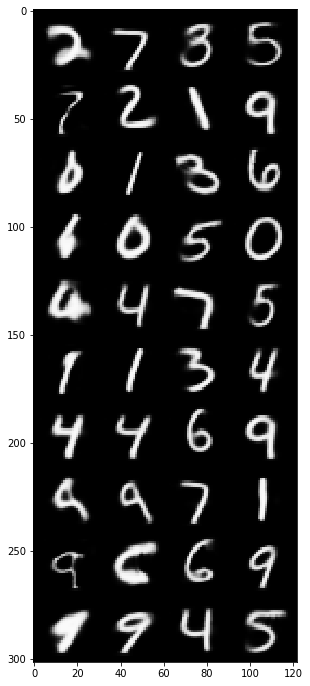

In [12]:
res = handler.plot_model(do_originals=False, do_reconstructions=False,
                   do_random_samples=False, do_traversals=False, do_hybrisation=True, first=False)
fig = res['hybrids']
#fname = fig_path / "hybridsLowSae.png"
#fig.savefig(fname)

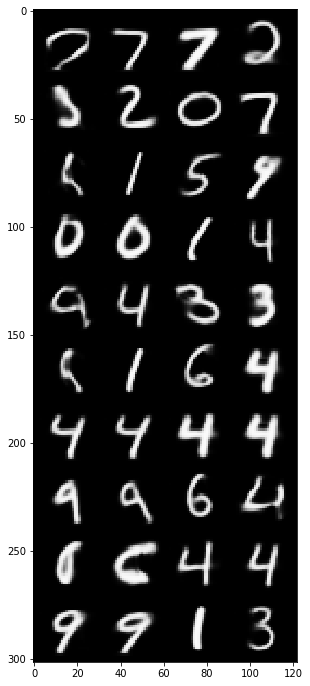

In [13]:
res = handler.plot_model(do_originals=False, do_reconstructions=False,
                   do_random_samples=False, do_traversals=False, do_hybrisation=True, first=True)
fig = res['hybrids']
#fname = fig_path / "hybridsHighSae.png"
#fig.savefig(fname)

In [10]:
handlerESAE = VisualModelHandler.from_config(model_name="ESAE", model_version="standardS", data="MNIST")

configs/models/ESAE/standardS.yaml
ESAE model hanlder loaded.


In [11]:
handlerESAE.load_checkpoint()

Loading latest checkpoint at logs\ESAE\standardS_MNIST\checkpoints\epoch=249-step=82120.ckpt .
MODEL SUMMARY
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
              Mish-3           [-1, 32, 14, 14]               0
       BatchNorm2d-4           [-1, 32, 14, 14]              64
         ConvBlock-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           9,248
              Mish-7           [-1, 32, 14, 14]               0
       BatchNorm2d-8           [-1, 32, 14, 14]              64
         ConvBlock-9           [-1, 32, 14, 14]               0
           Conv2d-10           [-1, 32, 14, 14]           9,248
        MaxPool2d-11             [-1, 32, 7, 7]               0
             Mish-12             [-1, 32, 7, 7]           

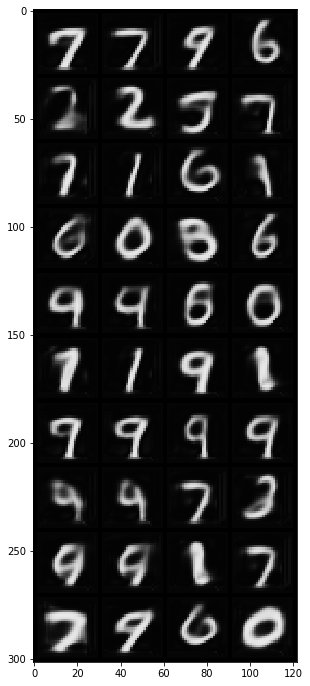

In [18]:
res = handlerESAE.plot_model(do_originals=False, do_reconstructions=False,
                   do_random_samples=False, do_traversals=False, do_hybrisation=True, first=False)
fig = res['hybrids']
#fname = fig_path / "hybridsLowESAE.png"
#fig.savefig(fname)

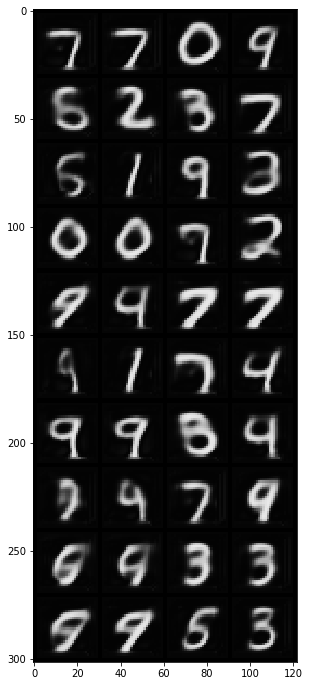

In [19]:
res = handlerESAE.plot_model(do_originals=False, do_reconstructions=False,
                   do_random_samples=False, do_traversals=False, do_hybrisation=True, first=True)
fig = res['hybrids']
#fname = fig_path / "hybridsHighESAE.png"
#fig.savefig(fname)

In [12]:
handlerVAE = VisualModelHandler.from_config(model_name="BetaVAE", model_version="standard", data="MNIST")
handlerVAE.load_checkpoint()

BetaVAE model hanlder loaded.
Loading latest checkpoint at logs\BetaVAE\standard_MNIST\checkpoints\final.ckpt .
MODEL SUMMARY
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             640
         MaxPool2d-2           [-1, 64, 14, 14]               0
              Mish-3           [-1, 64, 14, 14]               0
       BatchNorm2d-4           [-1, 64, 14, 14]             128
         ConvBlock-5           [-1, 64, 14, 14]               0
            Conv2d-6           [-1, 64, 14, 14]          36,928
              Mish-7           [-1, 64, 14, 14]               0
       BatchNorm2d-8           [-1, 64, 14, 14]             128
         ConvBlock-9           [-1, 64, 14, 14]               0
           Conv2d-10           [-1, 64, 14, 14]          36,928
        MaxPool2d-11             [-1, 64, 7, 7]               0
             Mish-12             [-1, 64,

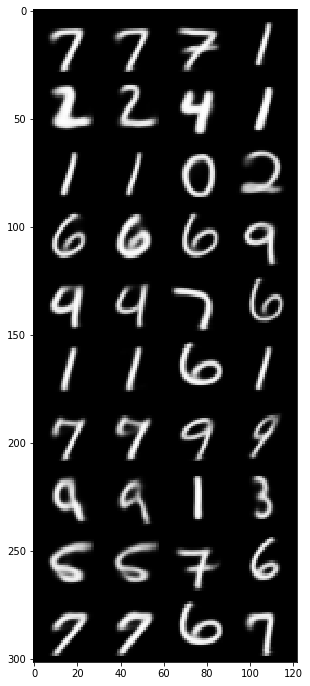

In [15]:
res = handlerVAE.plot_model(do_originals=False, do_reconstructions=False,
                   do_random_samples=False, do_traversals=False, do_hybrisation=True, first=True)
fig = res['hybrids']
fname = fig_path / "hybridsHighVAE.png"
fig.savefig(fname)

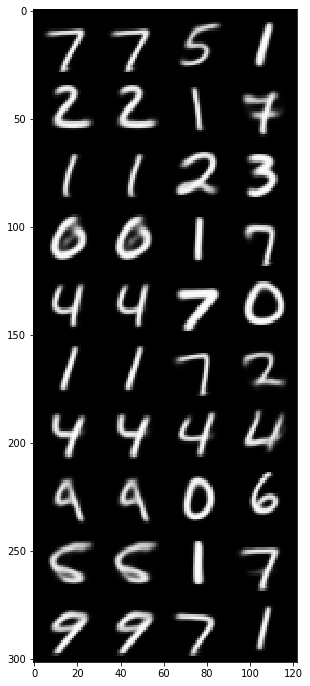

In [18]:
res = handlerVAE.plot_model(do_originals=False, do_reconstructions=False,
                   do_random_samples=False, do_traversals=False, do_hybrisation=True, first=False)
fig = res['hybrids']
fname = fig_path / "hybridsLowVAE.png"
fig.savefig(fname)

In [13]:
handlerRSAE = VisualModelHandler.from_config(model_name="RSAE", model_version="standardS", data="MNIST")
handlerRSAE.load_checkpoint()

configs/models/RSAE/standardS.yaml
RSAE model hanlder loaded.
Loading latest checkpoint at logs\RSAE\standardS_MNIST\checkpoints\final.ckpt .
MODEL SUMMARY
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
              Mish-3           [-1, 32, 14, 14]               0
       BatchNorm2d-4           [-1, 32, 14, 14]              64
         ConvBlock-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           9,248
              Mish-7           [-1, 32, 14, 14]               0
       BatchNorm2d-8           [-1, 32, 14, 14]              64
         ConvBlock-9           [-1, 32, 14, 14]               0
           Conv2d-10           [-1, 32, 14, 14]           9,248
        MaxPool2d-11             [-1, 32, 7, 7]               0
           

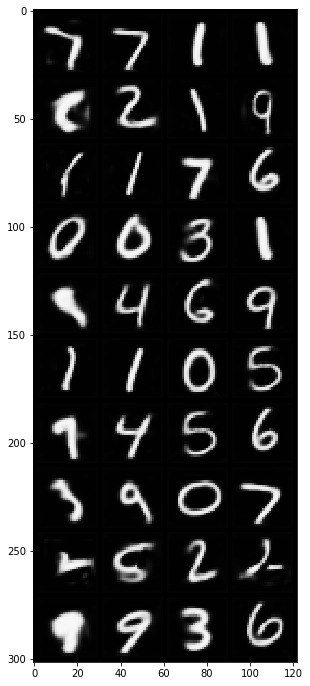

In [19]:
res = handlerRSAE.plot_model(do_originals=False, do_reconstructions=False,
                   do_random_samples=False, do_traversals=False, do_hybrisation=True, first=True)
fig = res['hybrids']
fname = fig_path / "hybridsHighRSAE.png"
fig.savefig(fname)

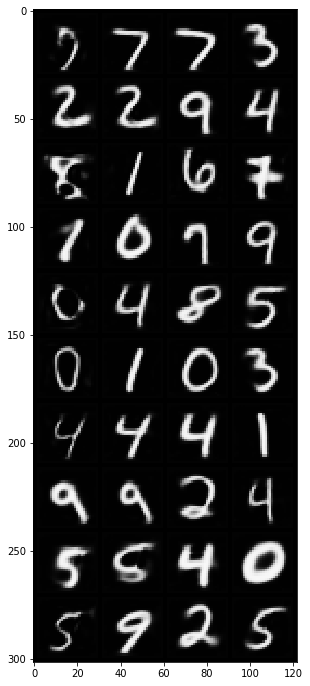

In [20]:
res = handlerRSAE.plot_model(do_originals=False, do_reconstructions=False,
                   do_random_samples=False, do_traversals=False, do_hybrisation=True, first=False)
fig = res['hybrids']
fname = fig_path / "hybridsLowRSAE.png"
fig.savefig(fname)

---

In [14]:
LR = handler.latent_responses(num_batches=10, num_samples=100)

Computing latent response matrix


RuntimeError: CUDA error: unspecified launch failure

---

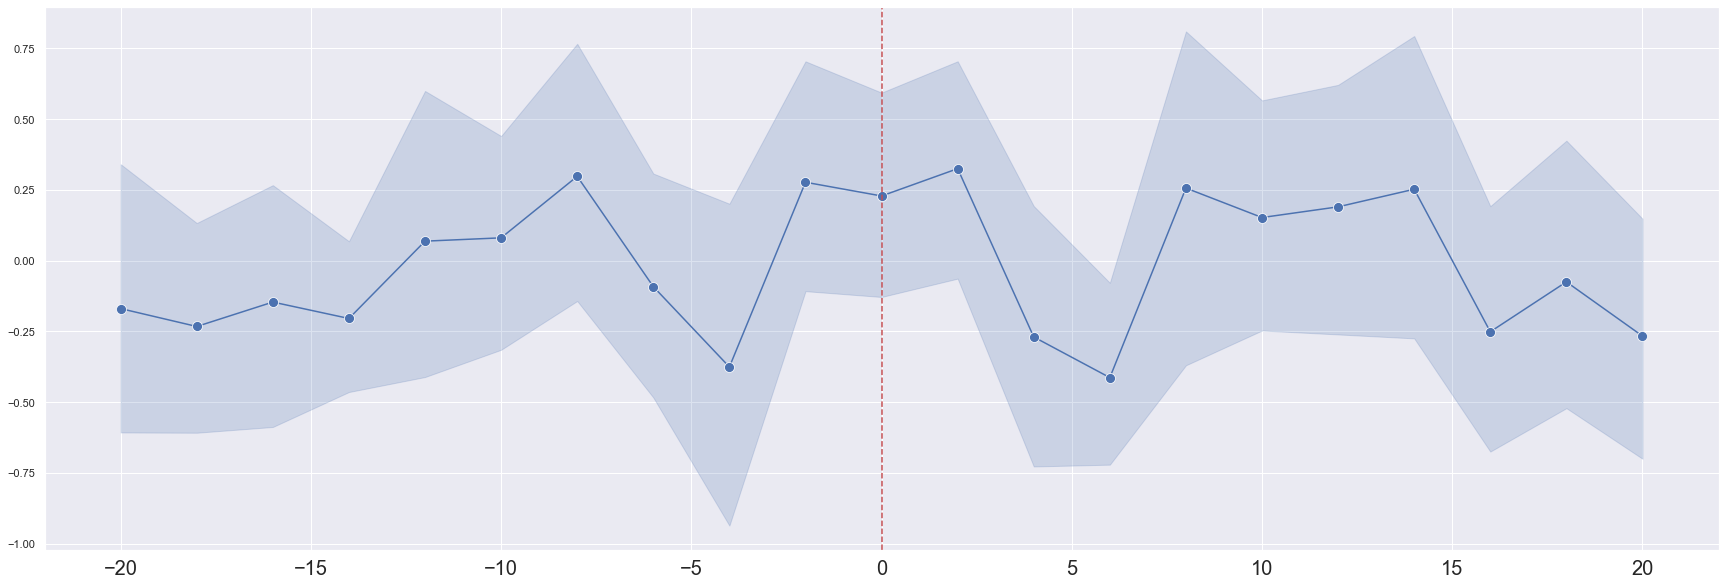

In [20]:
figure = plt.figure(figsize=(30,10))
N=21
dist = np.linspace(-20,20,21)
Nlosses = np.random.randn(N,21)
ax = sns.lineplot(np.tile(dist, N), Nlosses.reshape(-1,), marker=".", markersize=20)
ax.tick_params(axis="x", labelsize=20) 
plt.axvline(0, color='r', linestyle="--")

[(0, 30)]

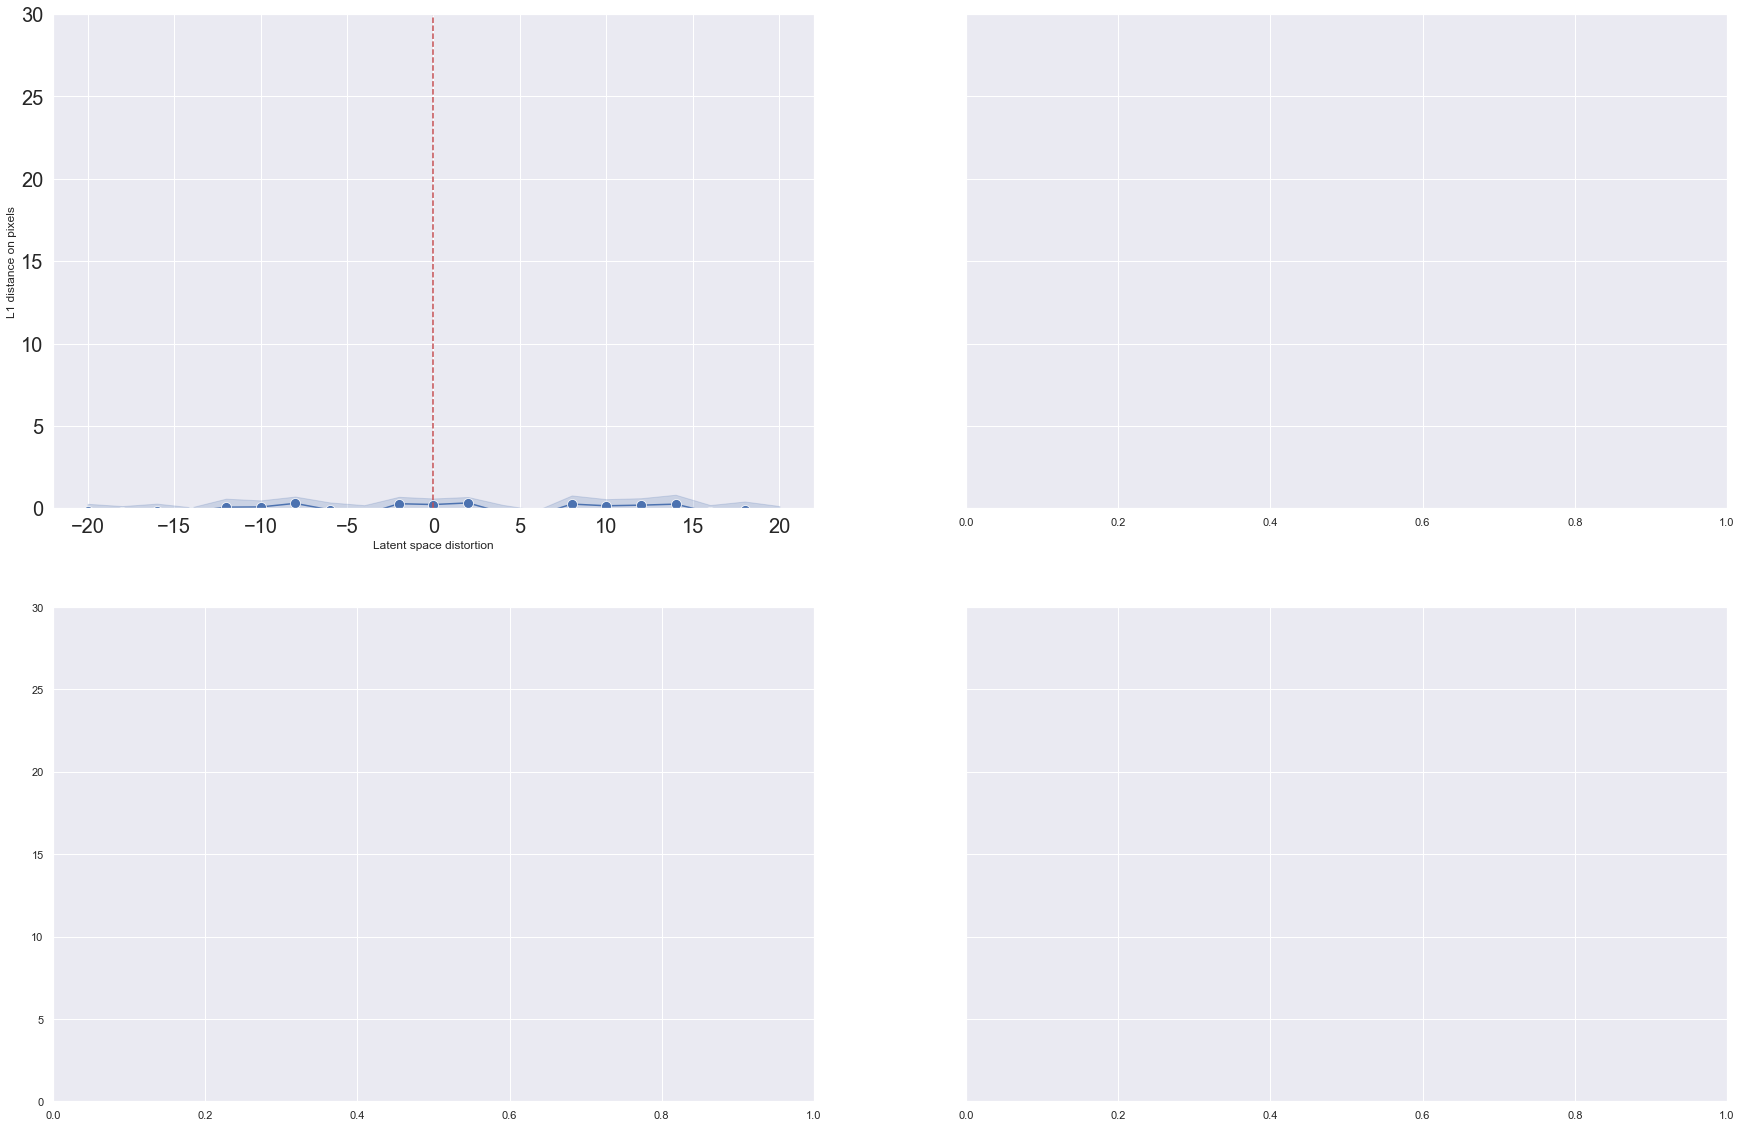

In [22]:
fig, ax = plt.subplots(2, 2, sharey=True, figsize=(30,20))
sns.set(font_scale = 1)
axi=sns.lineplot(np.tile(dist, N), Nlosses.reshape(-1,), marker=".", markersize=20, ax= ax[0,0])
ax[0,0].axvline(0, color='r', linestyle="--")
axi.set(ylabel='L1 distance on pixels', xlabel='Latent space distortion')
axi.tick_params(axis="x", labelsize=20) 
axi.tick_params(axis="y", labelsize=20) 

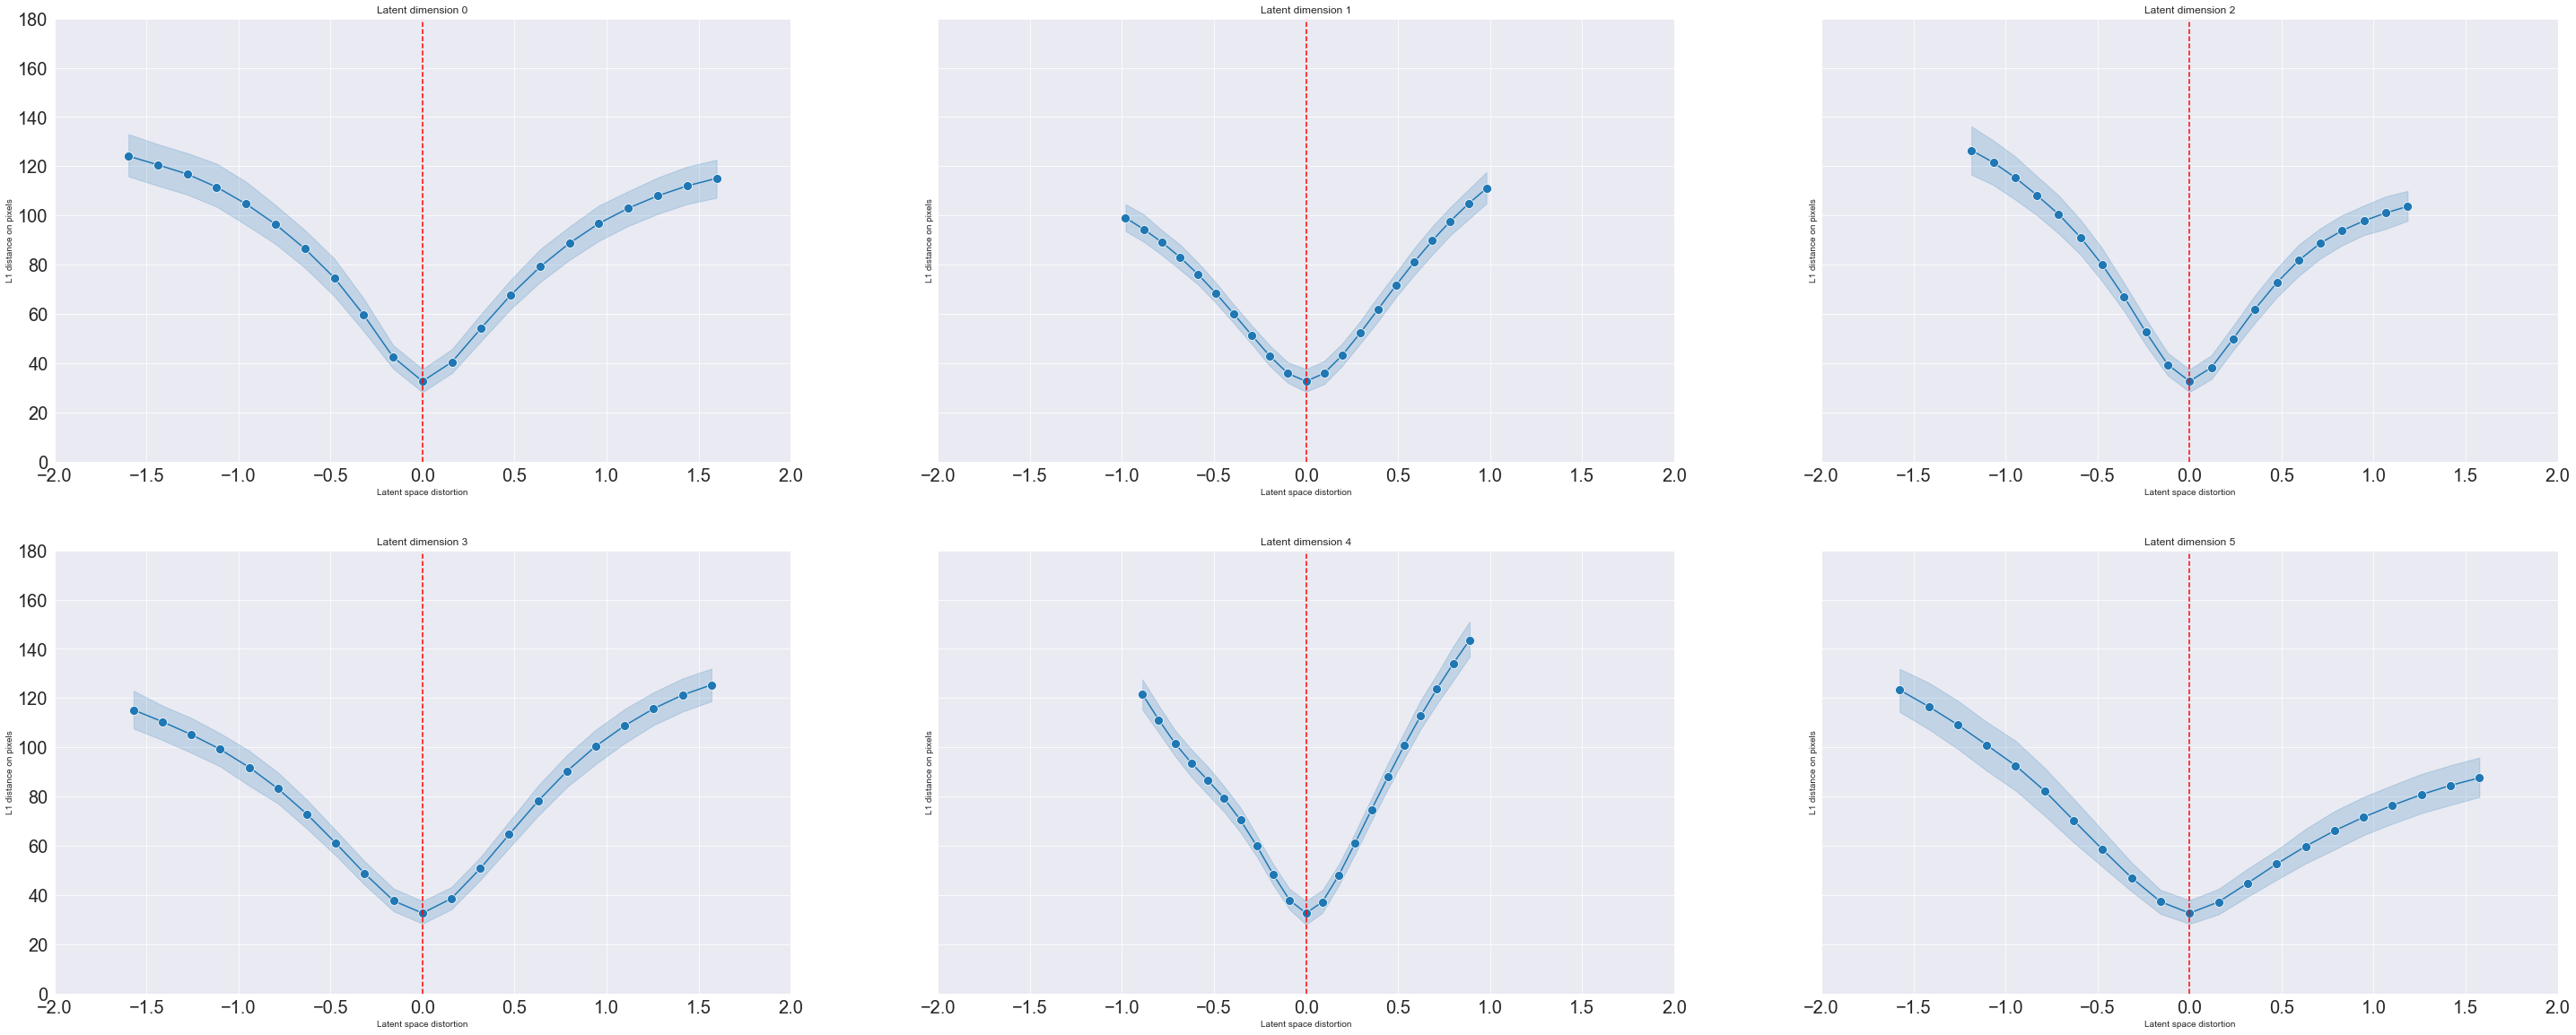

In [22]:
res = handler.plot_model(do_originals=False, do_reconstructions=False,
                   do_random_samples=False, do_traversals=False, do_loss2distortion=True, 
                         figsize=(50,20), nrows=2, ylim=180, xlim=2)
fig = res['distortion']
fname = fig_path / "_distortionSAE.png"
fig.savefig(fname)

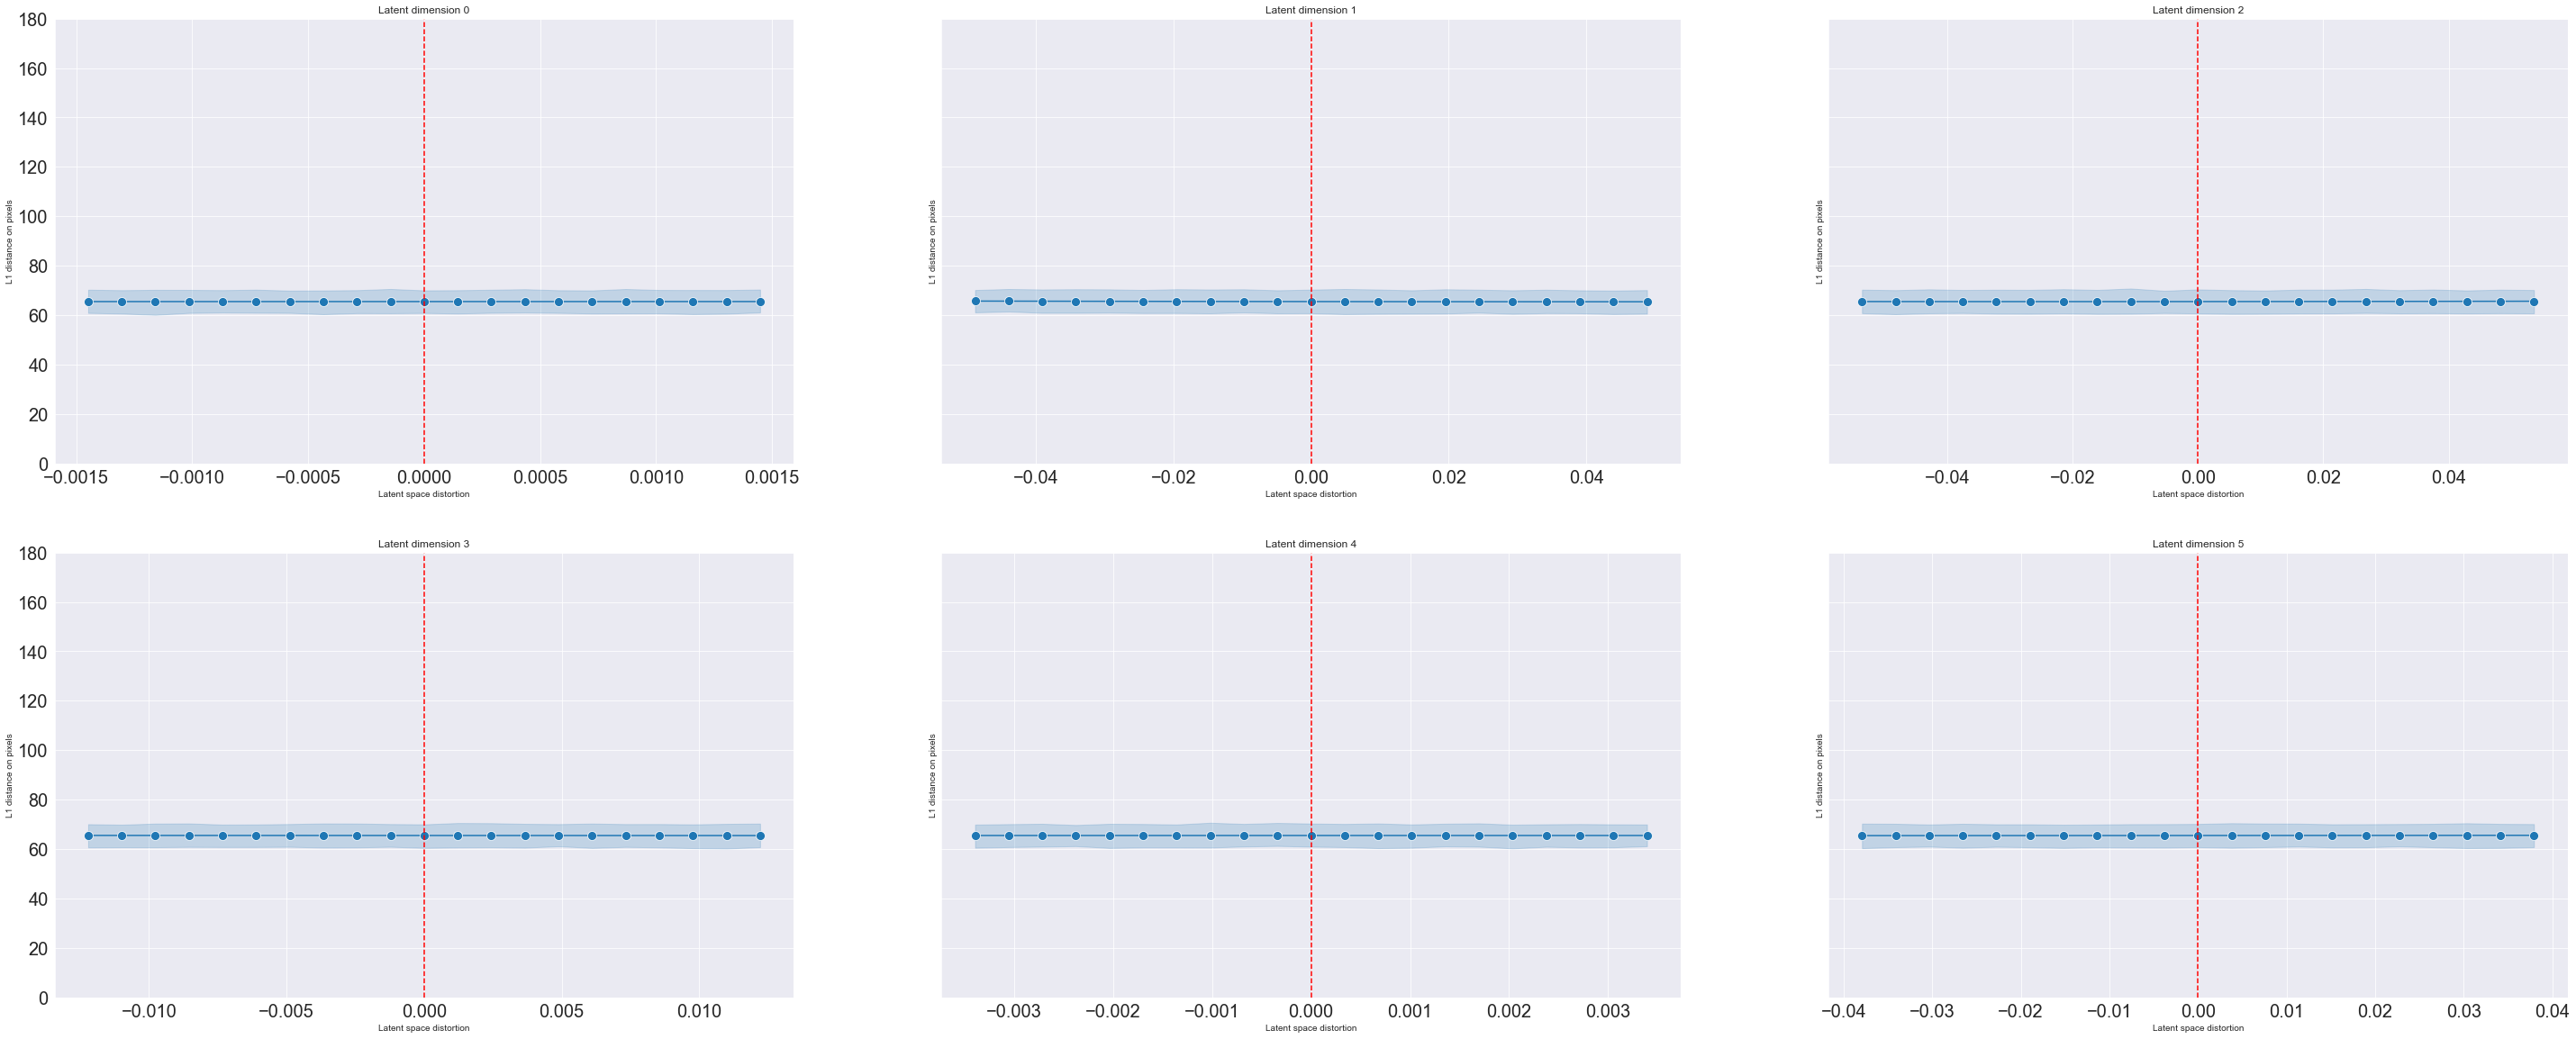

In [23]:
res = handlerESAE.plot_model(do_originals=False, do_reconstructions=False,
                   do_random_samples=False, do_traversals=False, do_loss2distortion=True, 
                             figsize=(50,20), nrows=2, ylim=180)
fig = res['distortion']
fname = fig_path / "distortionESAE.png"
fig.savefig(fname)

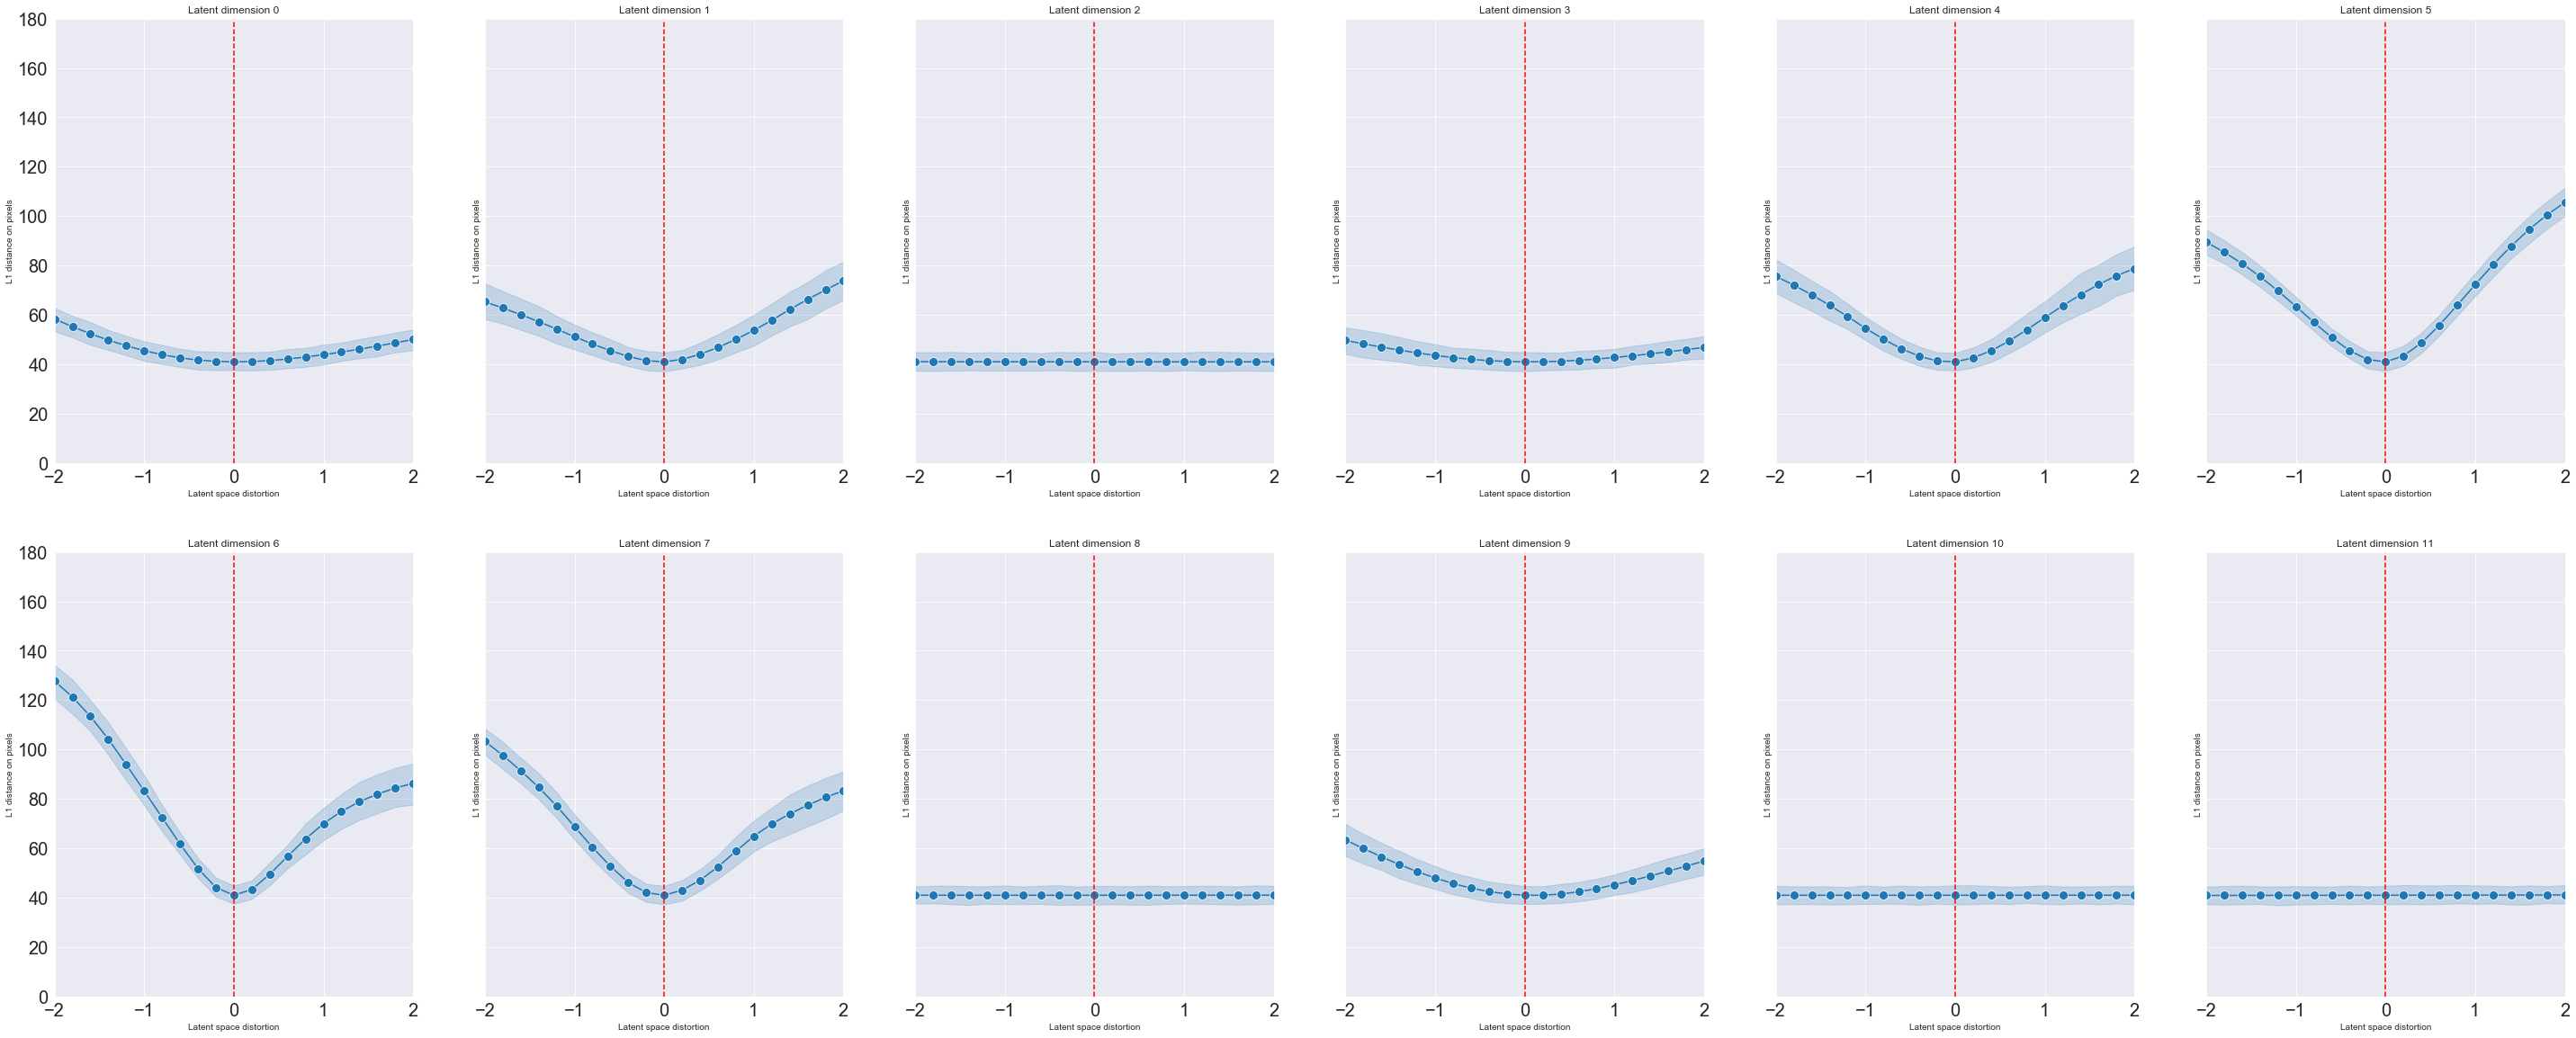

In [24]:
res = handlerVAE.plot_model(do_originals=False, do_reconstructions=False,
                            do_random_samples=False, do_traversals=False, do_loss2distortion=True, 
                            figsize=(50,20), nrows=2, font_scale=20, ylim=180, xlim=2)
fig = res['distortion']
fname = fig_path / "distortionVAE.png"
fig.savefig(fname)

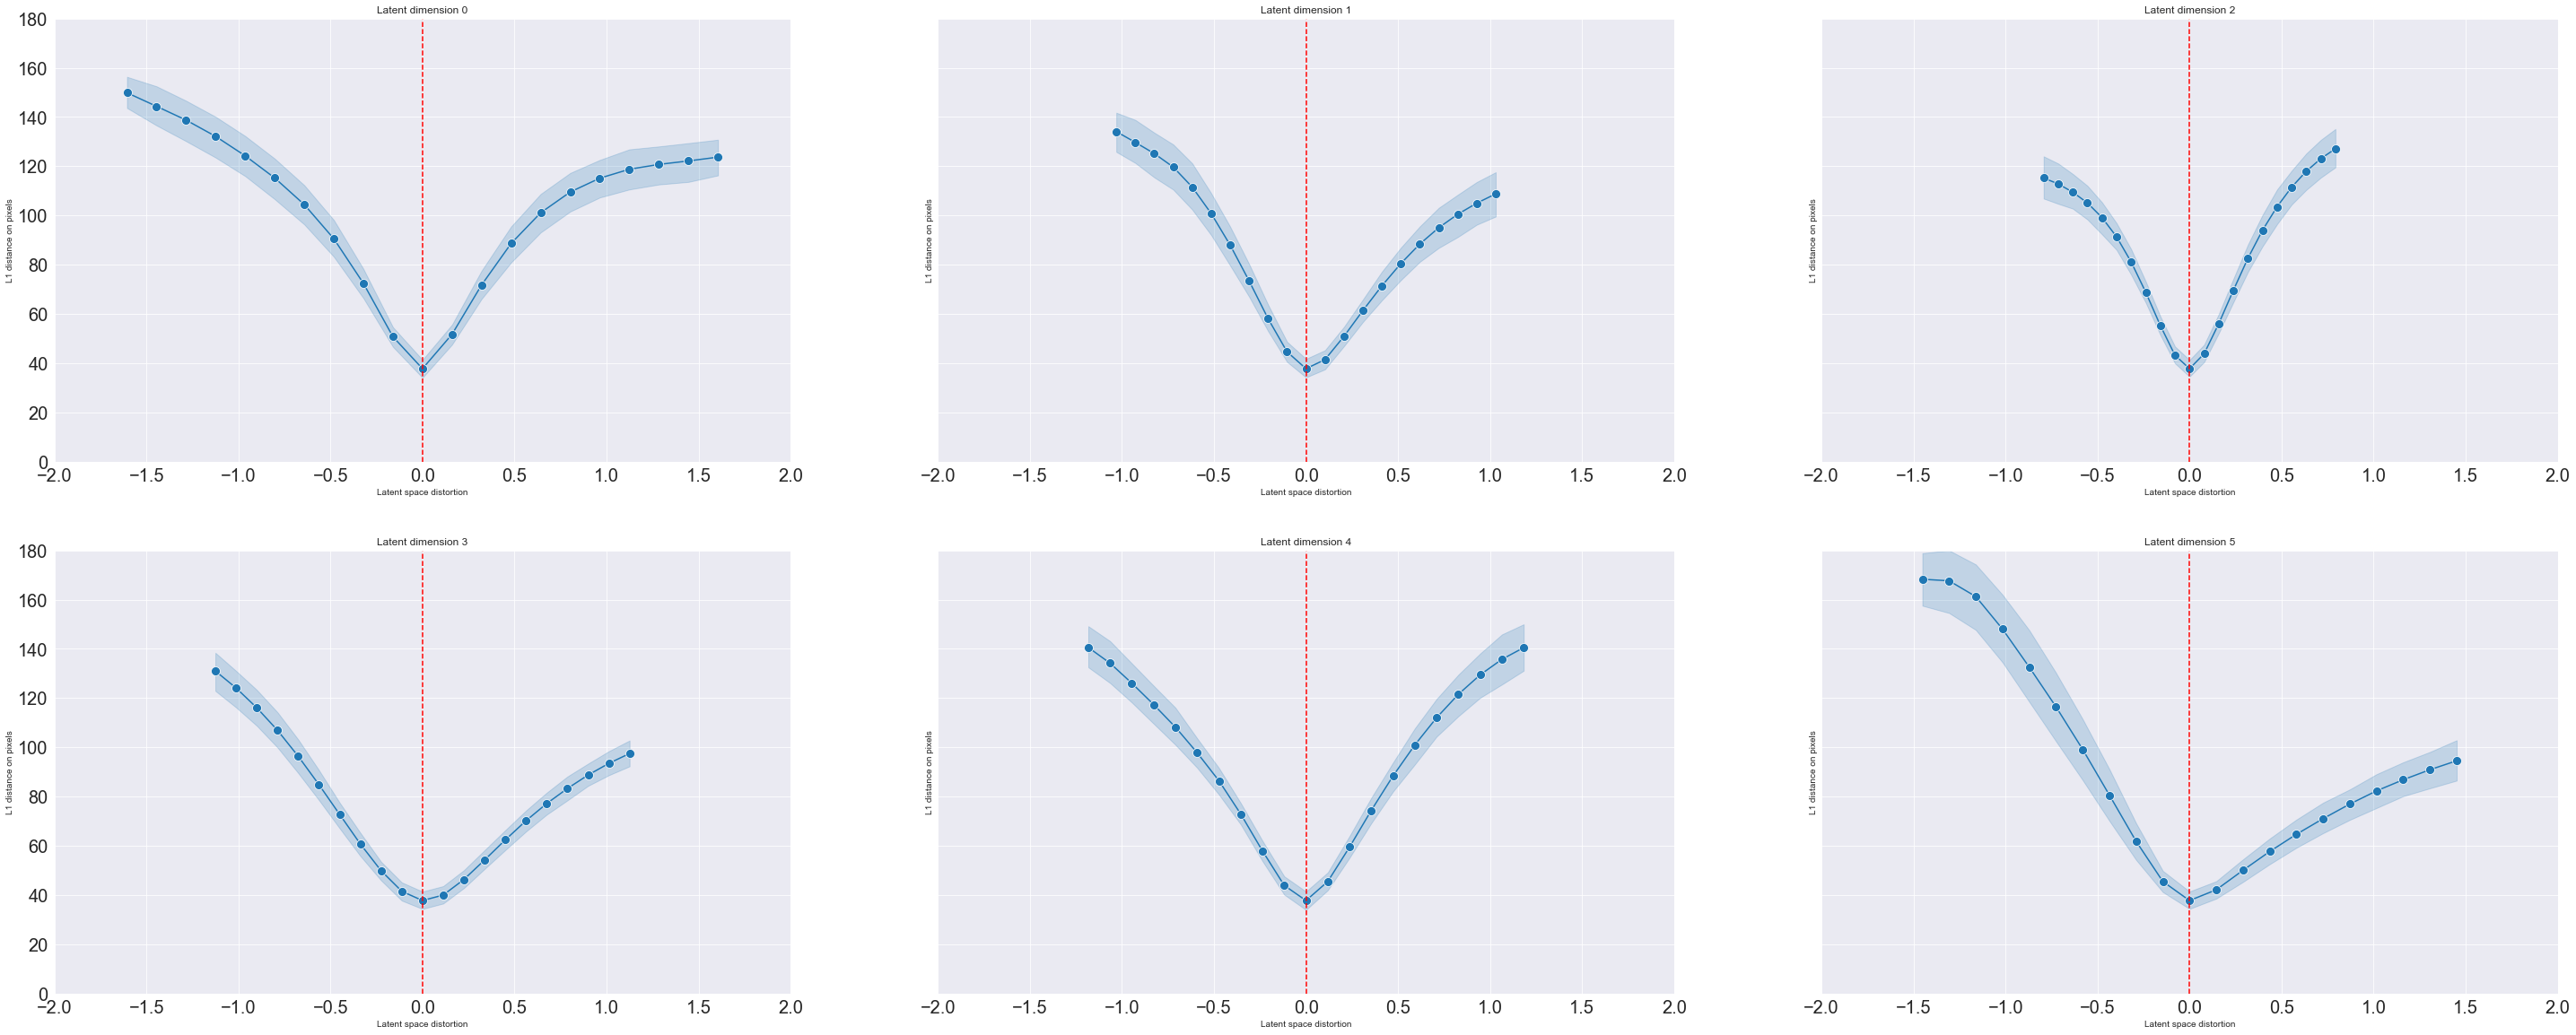

In [25]:
res = handlerRSAE.plot_model(do_originals=False, do_reconstructions=False,
                            do_random_samples=False, do_traversals=False, do_loss2distortion=True, 
                            figsize=(50,20), nrows=2, font_scale=20, ylim=180, xlim=2)
fig = res['distortion']
fname = fig_path / "distortionRSAE.png"
fig.savefig(fname)

In [11]:
vecSAE_handler = VectorModelHandler.from_config(model_name="VecSAE", model_version="standard", data="SynthVec", data_version="standard", verbose=False)

----------Opening SynthVec dataset version standard / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version standard / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
VecSAE model hanlder loaded.


In [12]:
vecSAE_handler.load_checkpoint()

Loading latest checkpoint at logs\VecSAE\standard_SynthVec_standard\checkpoints\final.ckpt .
----------Opening SynthVec dataset version standard / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version standard / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          10,100
         LeakyReLU-2                  [-1, 100]               0
            Linear-3                   [-1, 77]           7,777
         LeakyReLU-4                   [-1, 77]               0
            Linear-5                   [-1, 55]           4,290
         LeakyReLU-6                   [-1, 55]               0
            L

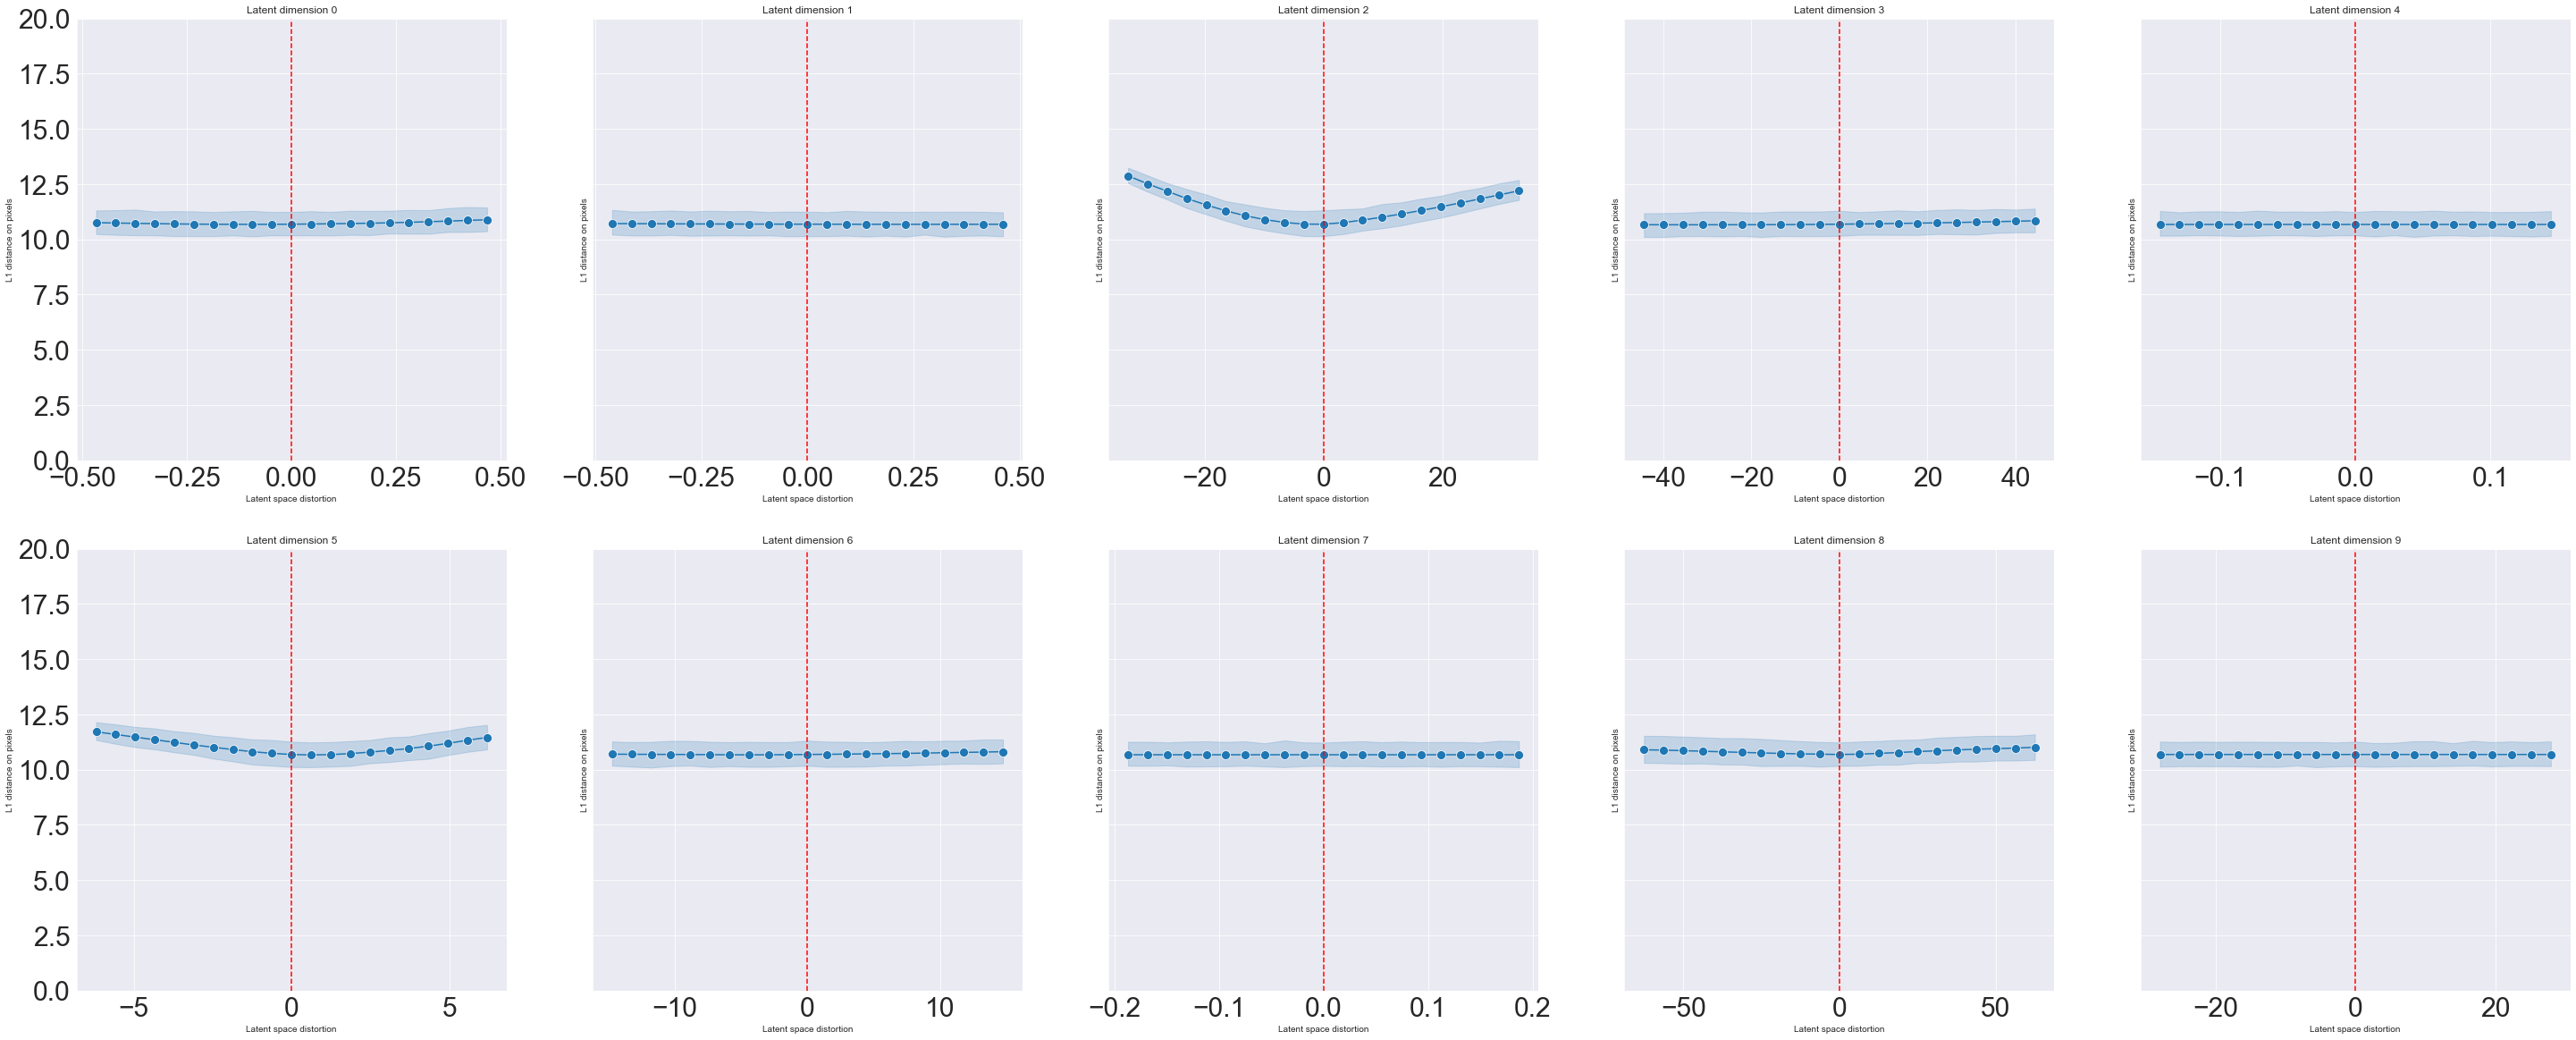

In [13]:
res = vecSAE_handler.plot_model(figsize=(50,20), nrows=2, ylim=20, font_scale=30)
fig = res['distortion']
fname = fig_path / "distortionVecSAE.png"
fig.savefig(fname)

In [8]:
vecESAE_handler = VectorModelHandler.from_config(model_name="VecESAE", model_version="standard", data="SynthVec", data_version="standard", verbose=False)

----------Opening SynthVec dataset version standard / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version standard / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
VecESAE model hanlder loaded.


In [9]:
vecESAE_handler.load_checkpoint()

Loading latest checkpoint at logs\VecESAE\standard_SynthVec_standard\checkpoints\final.ckpt .
----------Opening SynthVec dataset version standard / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version standard / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          10,100
         LeakyReLU-2                  [-1, 100]               0
            Linear-3                   [-1, 77]           7,777
         LeakyReLU-4                   [-1, 77]               0
            Linear-5                   [-1, 55]           4,290
         LeakyReLU-6                   [-1, 55]               0
            

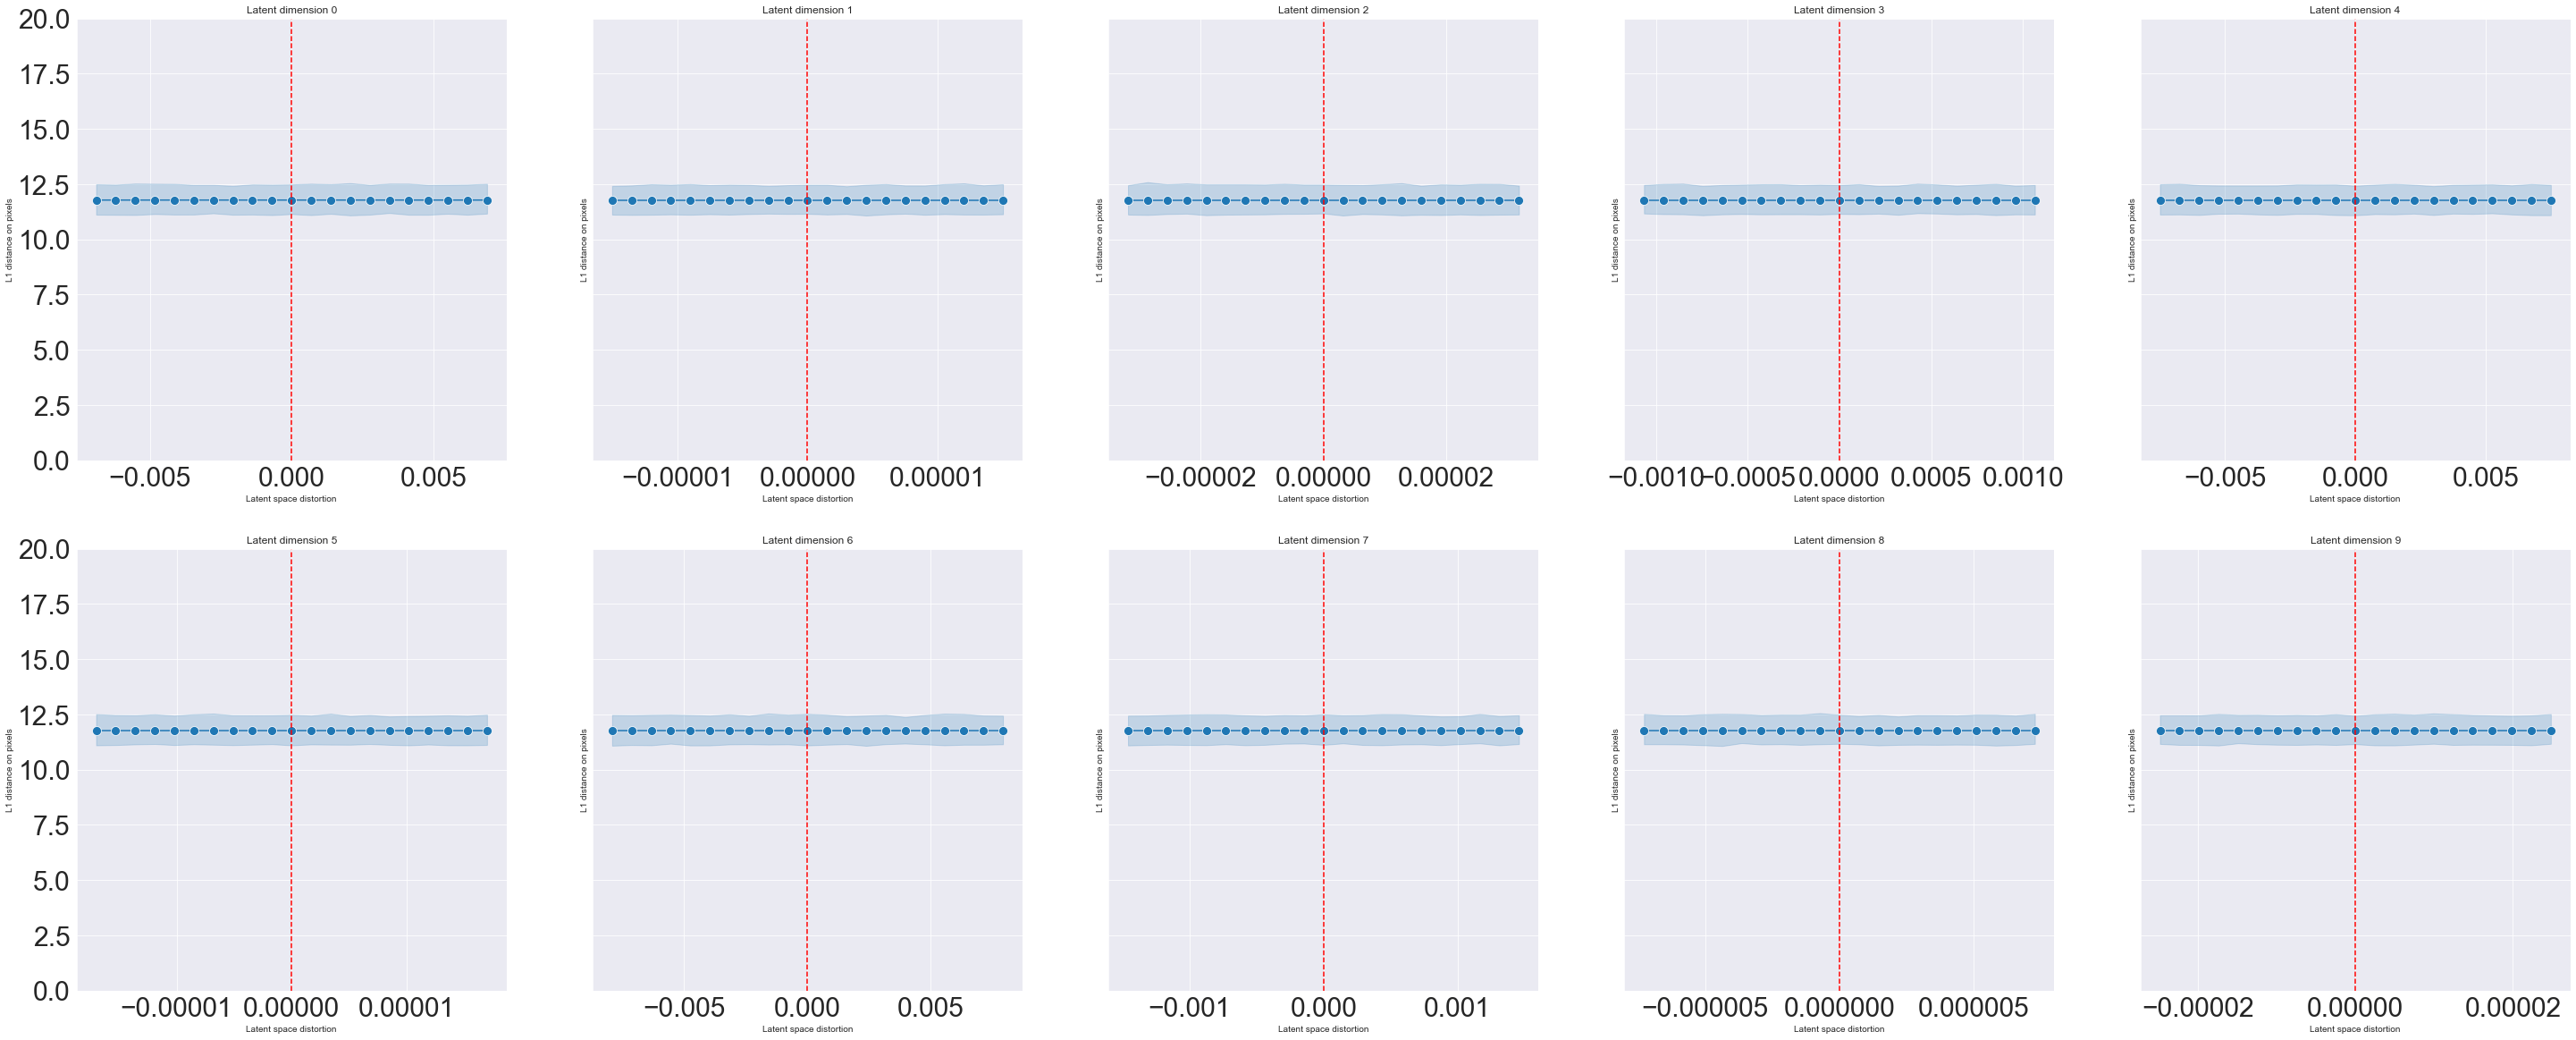

In [15]:
res = vecESAE_handler.plot_model(figsize=(50,20), nrows=2, ylim=20, font_scale=30)
fig = res['distortion']
fname = fig_path / "distortionVecESAE.png"
if os.path.isfile(fname):
    os.remove(fname)
fig.savefig(fname)

In [17]:
vecVAE_handler = VectorModelHandler.from_config(model_name="VecVAE", model_version="standard", data="SynthVec", data_version="standard", verbose=False)

----------Opening SynthVec dataset version standard / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version standard / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
VecVAE model hanlder loaded.


In [22]:
vecVAE_handler.load_checkpoint()

Loading latest checkpoint at logs\VecVAE\standard_SynthVec_standard\checkpoints\epoch=24-step=13627.ckpt .
----------Opening SynthVec dataset version standard / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version standard / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          10,100
         LeakyReLU-2                  [-1, 100]               0
            Linear-3                   [-1, 77]           7,777
         LeakyReLU-4                   [-1, 77]               0
            Linear-5                   [-1, 55]           4,290
         LeakyReLU-6                   [-1, 55]               0

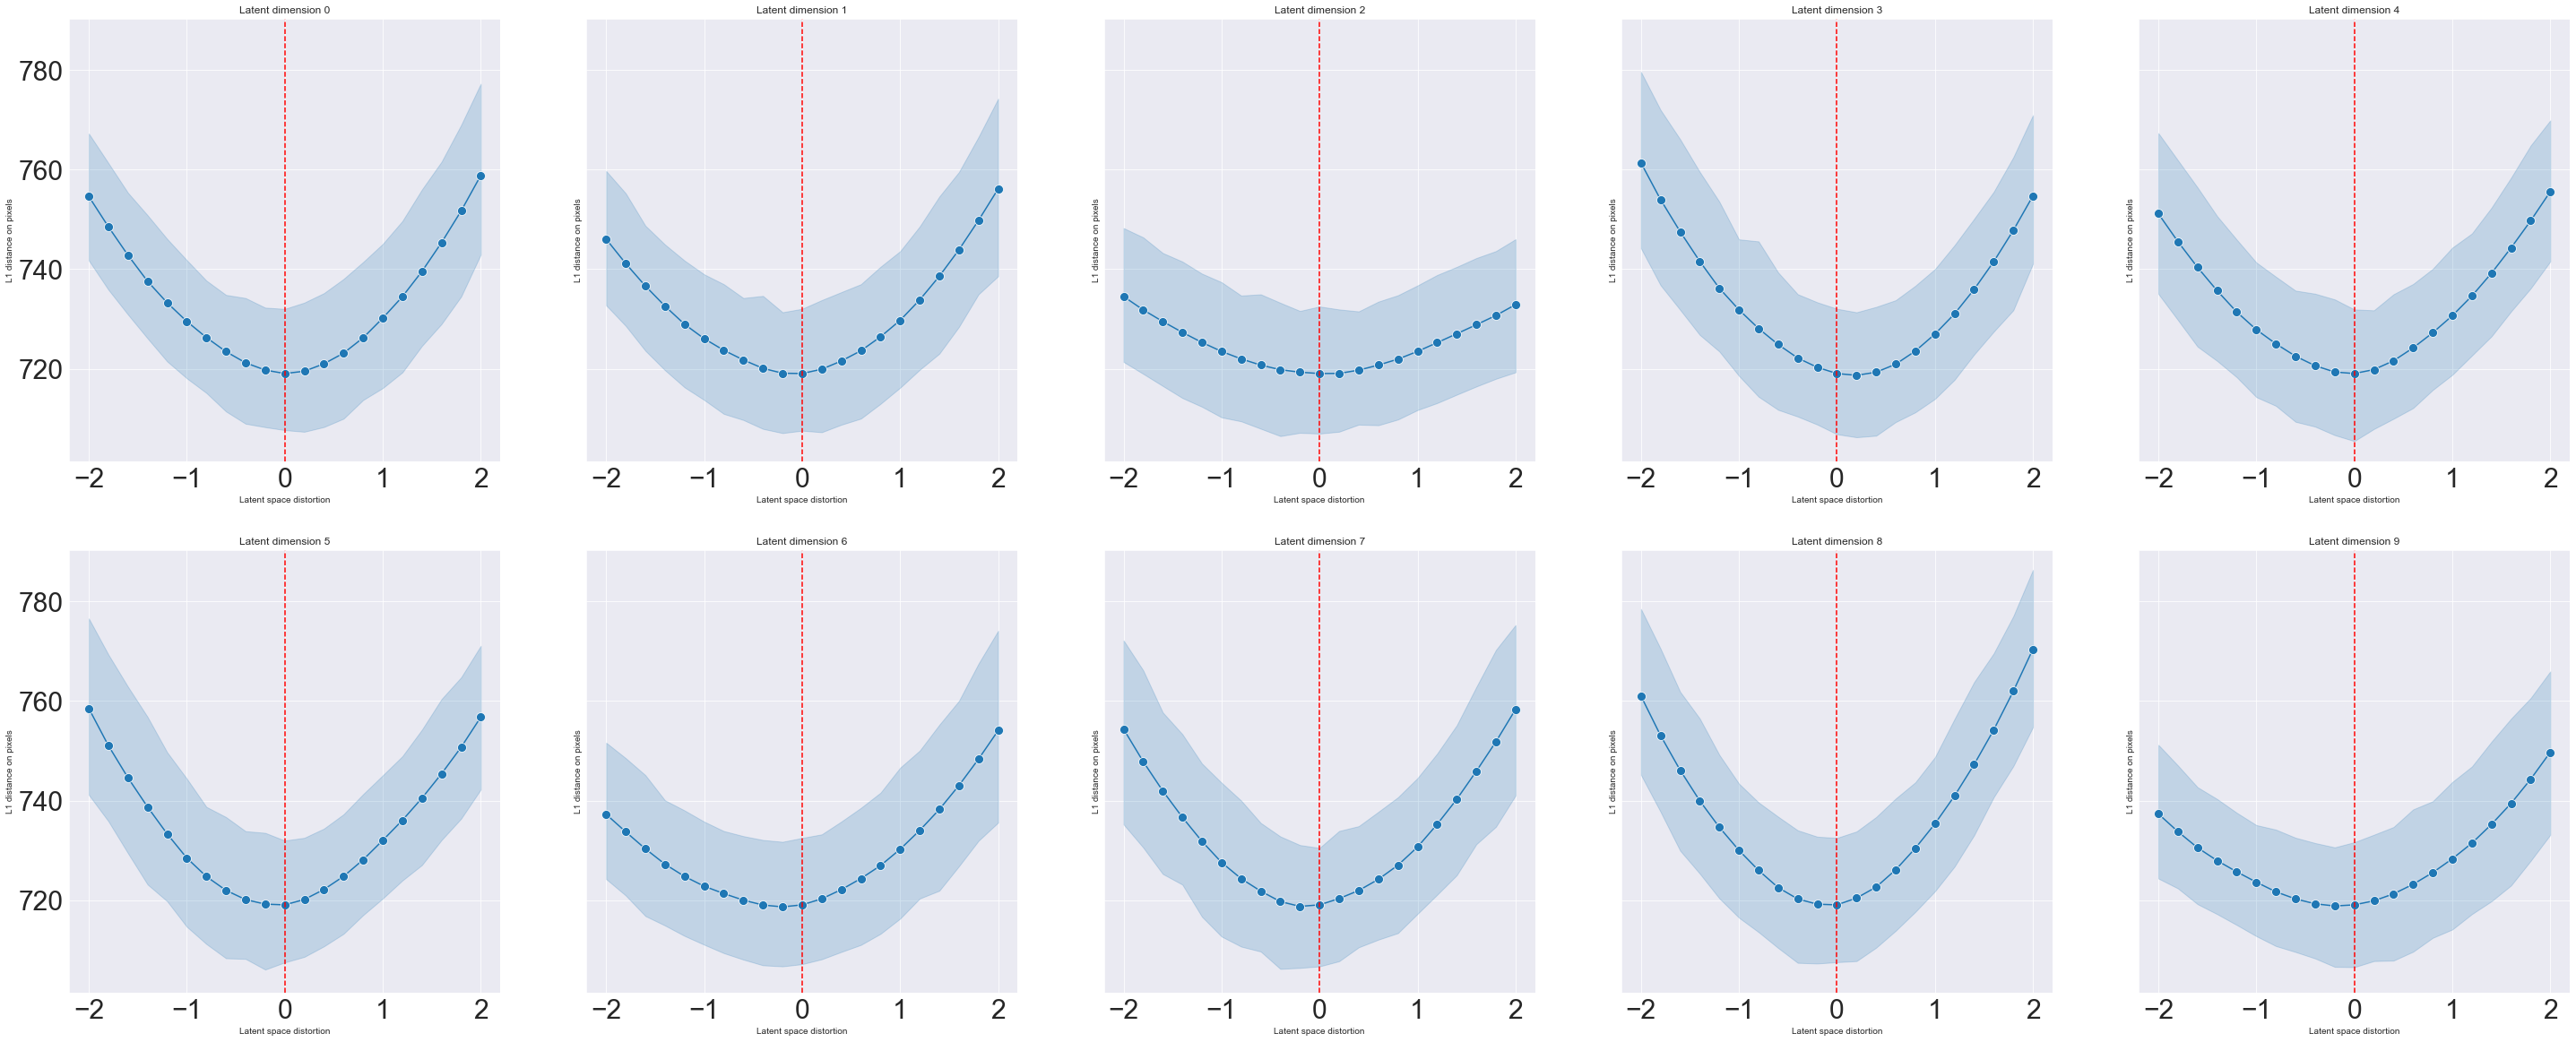

In [23]:
res = vecVAE_handler.plot_model(figsize=(50,20), nrows=2, font_scale=30)
fig = res['distortion']
fname = fig_path / "distortionVecVAE.png"
if os.path.isfile(fname):
    os.remove(fname)
fig.savefig(fname)

---

In [20]:
model_names = ["SAE","ESAE","VAE", "RSAE"]
scores_df = pd.DataFrame()
scores_df["model_name"] = model_names
all_scores = []

In [21]:
scores = handler.score_model(FID=False, disentanglement=True, orthogonality=True,save_scores=True, full=False)

Preparing the model for scoring orthogonality ...
Scoring orthogonality
RBF scoring
IMQ scoring
CAT scoring
dCov scoring


c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\dcor\_fast_dcov_avl.py:317: UserWarning: Falling back to uncompiled AVL fast distance covariance because of TypeError exception raised: No matching definition for argument type(s) array(float32, 1d, A), array(float32, 1d, A), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(f"Falling back to uncompiled AVL fast distance "


Scoring model disentanglement.
DCI scoring


c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:2625: RuntimeWarning: invalid value encountered in true_divide
  S /= log(base)
c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:2625: RuntimeWarning: divide by zero encountered in log
  S /= log(base)
C:\Users\Giulia\Study\projects\research\SAE\metrics\DCI.py:172: RuntimeWarning: invalid value encountered in true_divide
  code_importance = importance_matrix.sum(axis=1) / importance_matrix.sum()


IRS scoring
MIG scoring
Modularity explicitness scoring


C:\Users\Giulia\Study\projects\research\SAE\metrics\ModExp.py:123: RuntimeWarning: invalid value encountered in true_divide
  delta = numerator / denominator
c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


SAP scoring
Time elapsed for scoring 83


In [22]:
all_scores.append(scores)

In [23]:
#scores = handlerESAE.score_model(FID=False, disentanglement=True, orthogonality=True, save_scores=True, full=False)
scores = handlerESAE.load_scores()
all_scores.append(scores)

In [24]:
#scores = handlerVAE.score_model(FID=False, disentanglement=True, orthogonality=True, save_scores=True, full=False)
scores = handlerVAE.load_scores()
all_scores.append(scores)

In [25]:
scores = handlerRSAE.load_scores()
all_scores.append(scores)

In [26]:
for i,score_set in enumerate(all_scores): 
    for k,v in score_set.items():
        scores_df.loc[i,k] = v

In [27]:
scores_df

model_name       RBF       IMQ         CAT      dCOV  DCI       IRS  \
0        SAE  0.002699  0.023504  -39.176571  0.224136  NaN  0.620863   
1       ESAE  0.004271  0.028948  -41.469337  0.292190  NaN  0.492522   
2        VAE  0.001465  0.010816 -147.206253  0.140675  NaN  0.410131   
3       RSAE  0.002829  0.024132  -32.255348  0.191865  NaN  0.633627   

        MIG  ModExp    SAP  
0  0.054272     NaN  0.004  
1  0.019467     NaN  0.024  
2  0.013262     NaN  0.012  
3  0.030117     NaN  0.012

## Collecting scores for synthetic vector dataset experiments

In [28]:
#load all scores and save them in lists 
#extract relevan numbers from the lists and form a df
# plot df with seaborn
data_versions = ["standard","discrete","continuous","big"]
model_names = ["VecESAE","VecSAE","VecVAE"]

In [40]:
handlers=[]
for data_v in data_versions:
    for model_n in model_names: 
        handler = (VectorModelHandler(model_name=model_n, model_version="standard", 
                                           data="SynthVec", data_version=data_v, verbose=False))
        handlers.append(handler)

Loading VecESAE
--------------------
----------Opening SynthVec dataset version standard / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version standard / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
VecESAE model loaded.
Loading VecSAE
--------------------
----------Opening SynthVec dataset version standard / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version standard / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
VecSAE model loaded.
Loading VecVAE
--------------------
----------Opening SynthVec dataset version standard / train----------
Files already th

In [41]:
scores_df = pd.DataFrame()

In [42]:
scores_df["model_name"] = model_names*len(data_versions)
scores_df["data_version"] = [item for data_v in data_versions for item in [data_v]*len(model_names)]

In [43]:
scores = [handler.load_scores(name="scoring") for handler in handlers]

# - to go 
#scores = [handlers[3].load_scores()]
#scores[0]["extra_disentanglement"]=None

In [44]:
scores[0]

{'RBF': 0.015189409255981445,
 'IMQ': 0.04211711883544922,
 'CAT': -0.1615293025970459,
 'dCOV': 0.0004448918977173883,
 'DCI': 0.022975431934453228,
 'IRS': 0.6610408347408944,
 'MIG': 0.027064272688382594,
 'ModExp': 0.3066816420810107,
 'SAP': 0.0007999999999999993}

In [45]:
for i,score_set in enumerate(scores): 
    for k,v in score_set.items():
        scores_df.loc[i,k] = v

In [ ]:
# random fill - useful to test visualisations
#for k,v in scores[0].items():
#    scores_df.loc[:,k] = np.random.randn(12)**2
#scores_df = scores_df.drop("extra_disentanglement", axis=1)

In [46]:
scores_df

model_name data_version       RBF       IMQ          CAT       dCOV  \
0     VecESAE     standard  0.015189  0.042117    -0.161529   0.000445   
1      VecSAE     standard  0.026888  0.069378  -802.112671   5.240126   
2      VecVAE     standard  0.001399  0.010498  -127.531487   0.141176   
3     VecESAE     discrete  0.022906  0.057015    -0.446848   0.001741   
4      VecSAE     discrete  0.024454  0.033591 -1294.276245   4.202439   
5      VecVAE     discrete  0.001554  0.010958  -131.270096   0.142695   
6     VecESAE   continuous  0.009773  0.025878    -1.281475   0.006464   
7      VecSAE   continuous  0.003799  0.012843 -4008.612305  10.538882   
8      VecVAE   continuous  0.001347  0.010366  -129.345398   0.141924   
9     VecESAE          big  0.015315  0.041043   -20.298193   0.069307   
10     VecSAE          big  0.011545  0.029384  -443.893097   1.611764   
11     VecVAE          big  0.001400  0.010507  -118.712616   0.133360   

         DCI       IRS       MIG    ModExp       SAP  
0   0.022975  0.661041  0.027064  0.306682  0.000800  
1   0.005647  0.674220  0.005635  0.430792  0.011800  
2   0.000990  0.350142  0.002403  0.290196  0.007000  
3   0.017003  0.562547  0.017709  0.600752  0.003200  
4   0.015070  0.625581  0.028266  0.617612  0.026800  
5   0.001734  0.370357  0.002599  0.653227  0.007800  
6   0.038372  0.831236  0.008693  0.585250  0.010667  
7   0.005245  0.893096  0.001633  0.691180  0.016667  
8   0.005222  0.389475  0.005156  0.368557  0.007333  
9   0.009026  0.779077  0.009870  0.419960  0.011800  
10  0.002073  0.744406  0.000000  0.457181  0.004400  
11  0.001092  0.363689  0.001930  0.279527  0.006600

## Visualisations of model scores

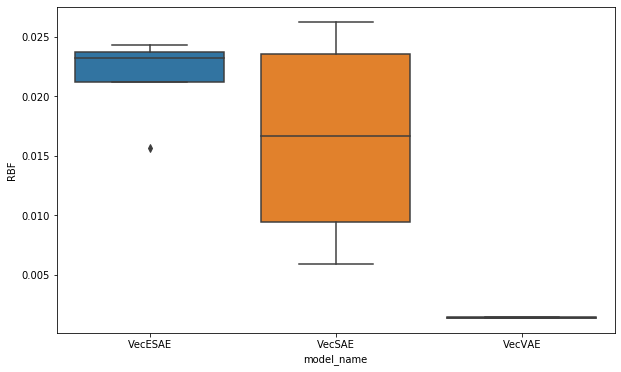

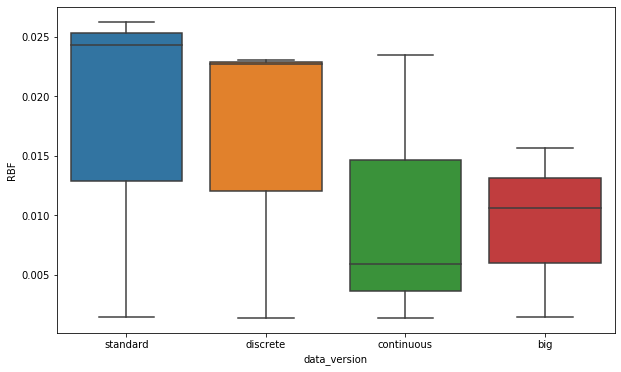

In [18]:
# finally visualising 
plt.figure(figsize=(10,6))
sns.boxplot(x='model_name',y='RBF',data=scores_df)
# finally visualising 
plt.figure(figsize=(10,6))
sns.boxplot(x='data_version',y='RBF',data=scores_df)


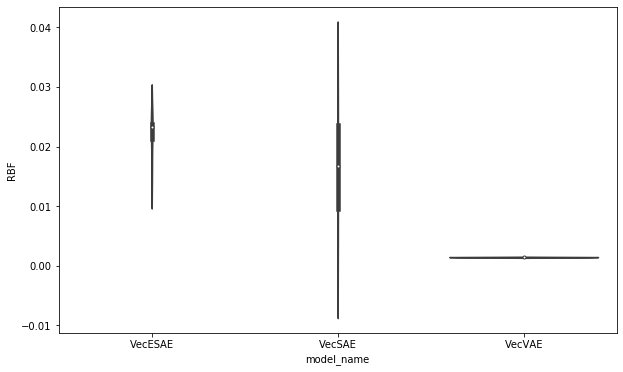

In [19]:
plt.figure(figsize=(10,6))
sns.violinplot(x='model_name',y='RBF',data=scores_df, split=True)
#sns.swarmplot(x='model_name',y='RBF',data=scores_df, split=True, color="white")

In [20]:
scores_df.columns[2:5]

Index(['RBF', 'IMQ', 'CAT'], dtype='object')

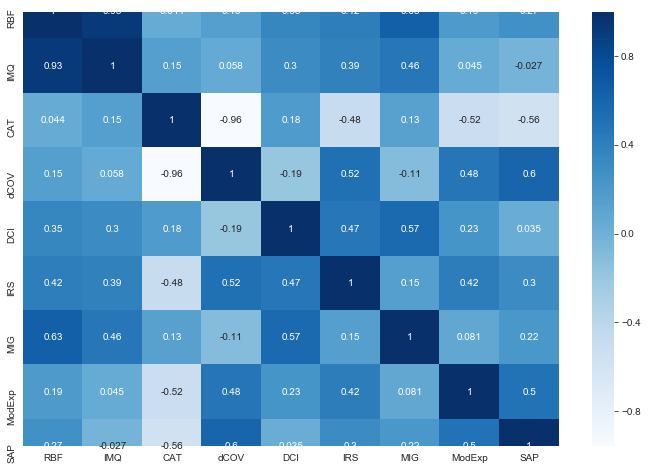

In [49]:
plt.figure(figsize=(12,8))

scores_corr = scores_df.corr()
sns.heatmap(scores_corr, annot=True, cmap='Blues')


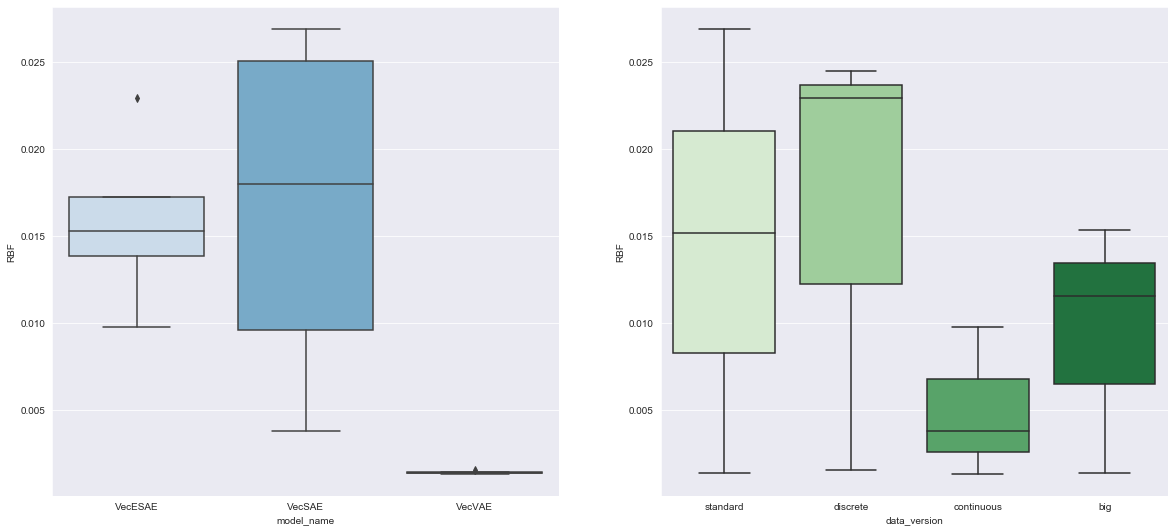

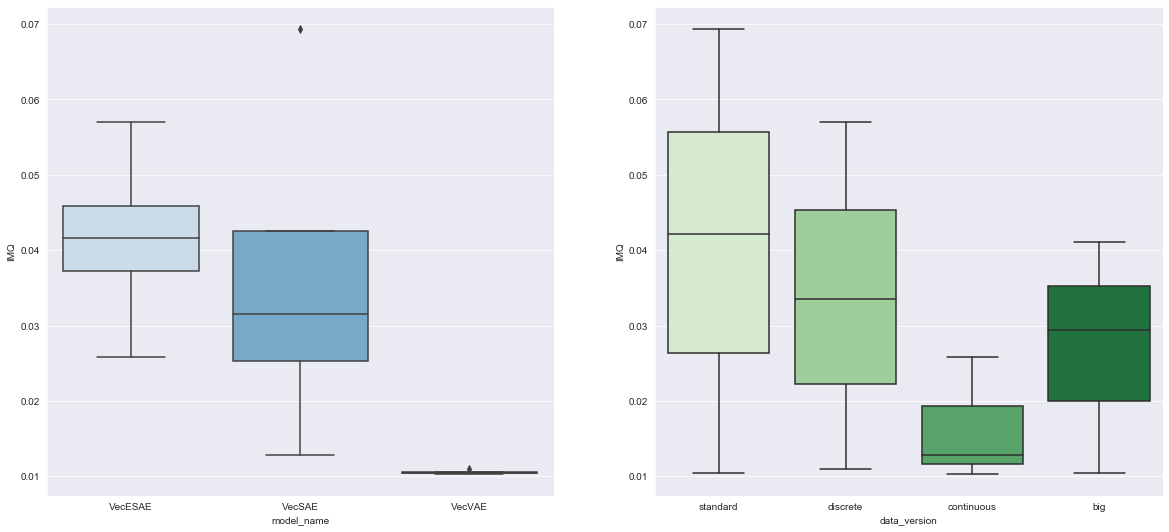

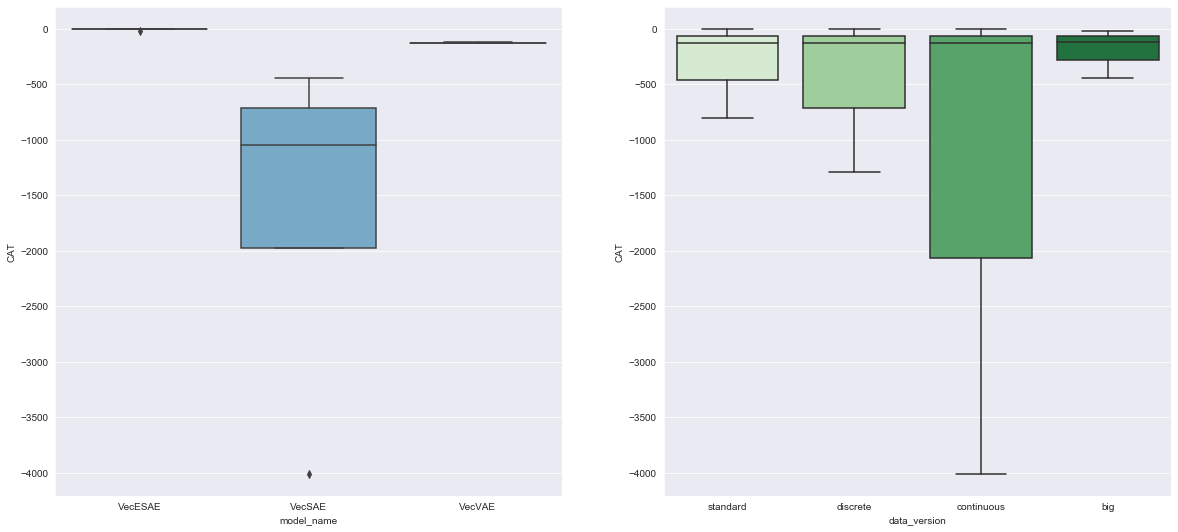

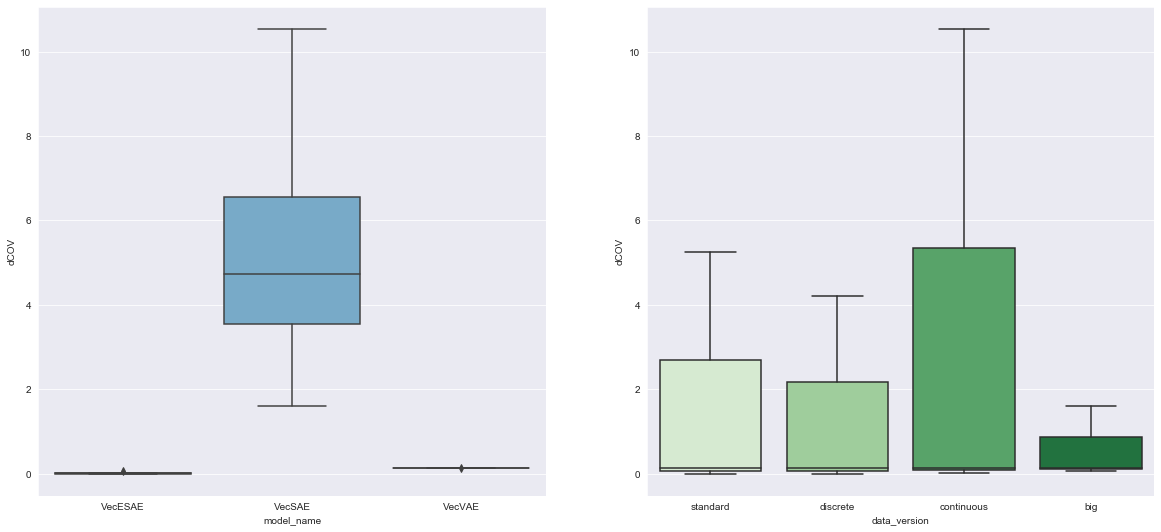

In [48]:
for k in scores_df.columns[2:6]: # orthogonality
    fig, axs = plt.subplots(ncols=2, figsize=(20,9))
    sns.boxplot(x='model_name',y=k,data=scores_df, ax=axs[0], palette="Blues")
    sns.boxplot(x='data_version',y=k,data=scores_df, ax=axs[1], palette="Greens")

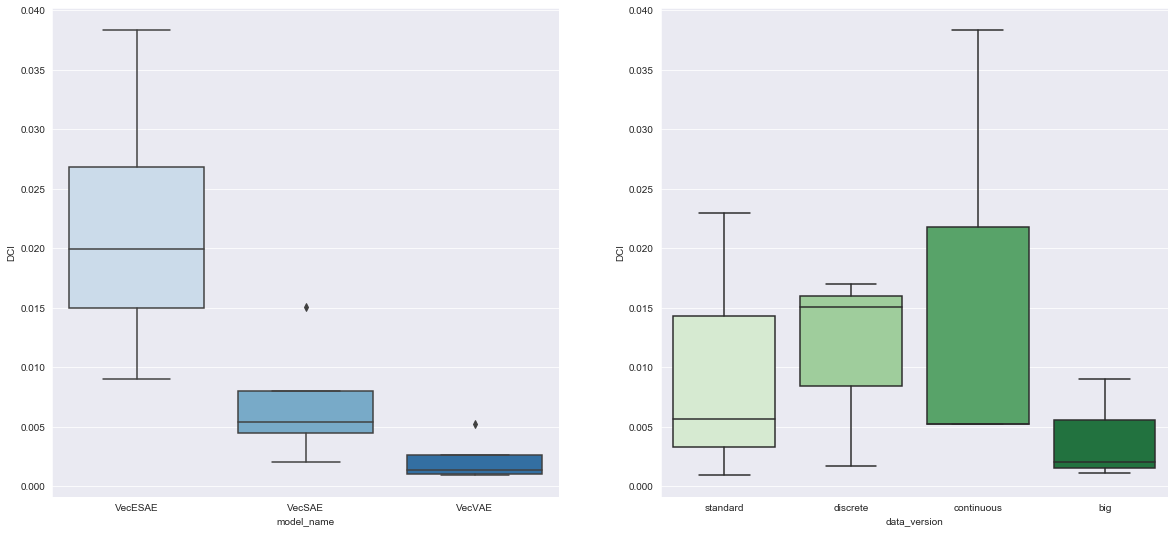

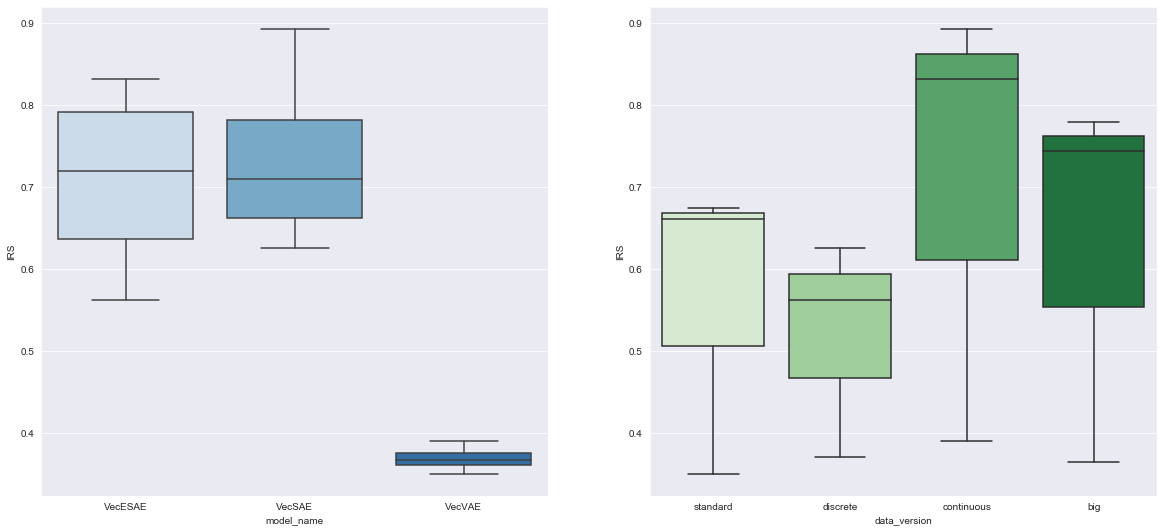

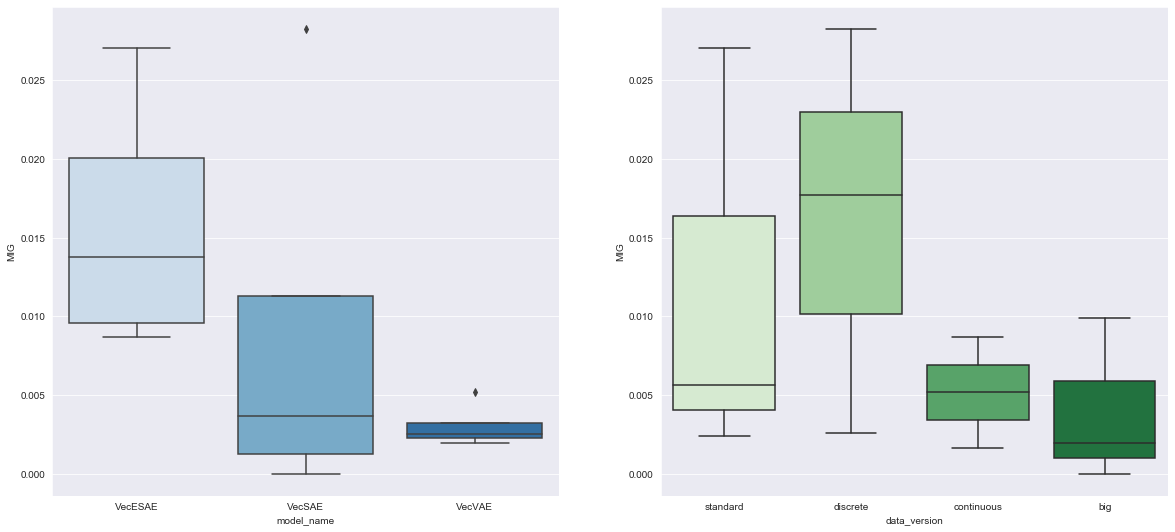

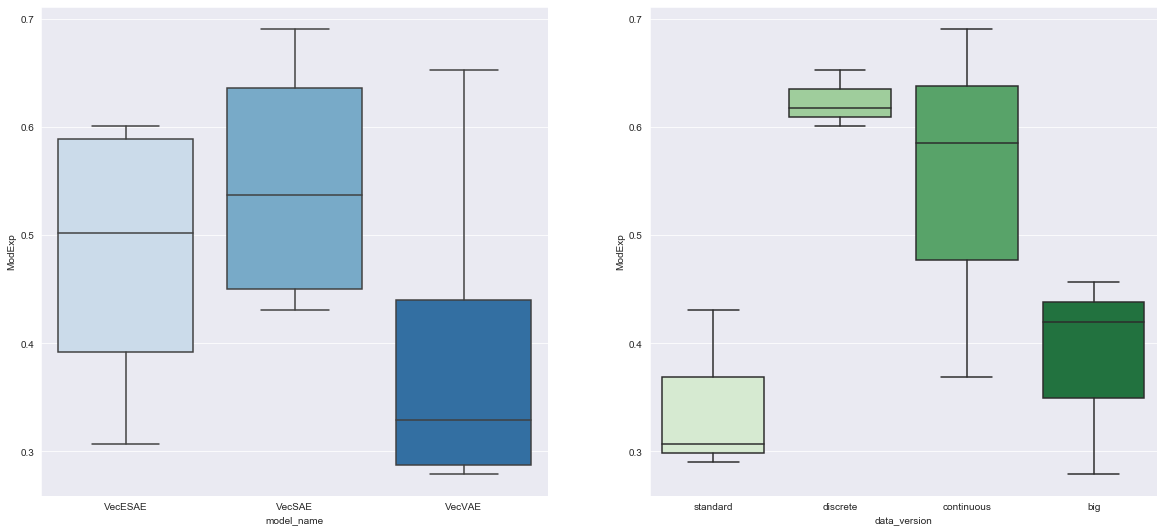

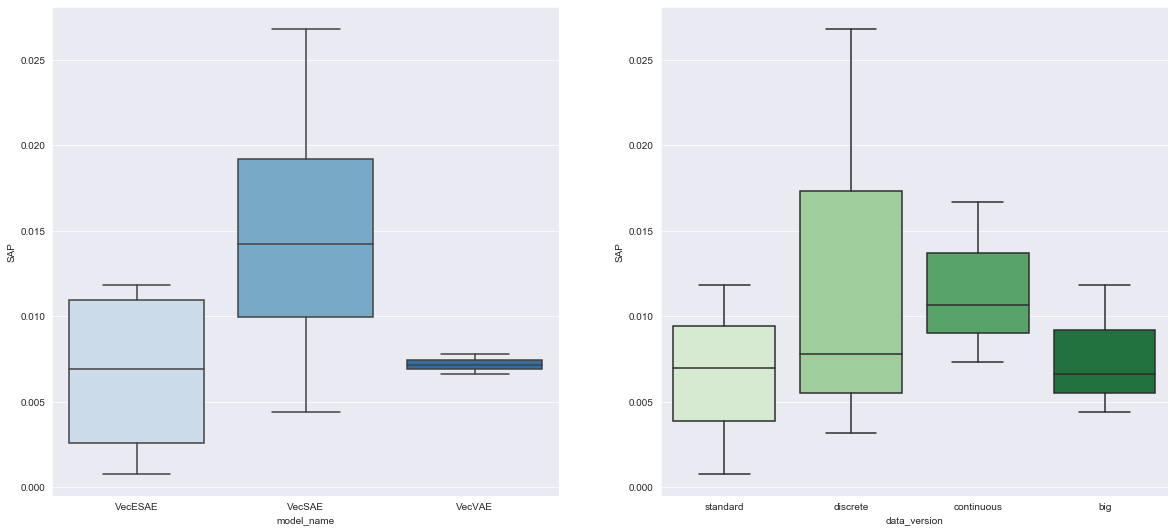

In [51]:
# finally visualising 
for k in scores_df.columns[6:]: # disentanglement
    fig, axs = plt.subplots(ncols=2, figsize=(20,9))
    sns.boxplot(x='model_name',y=k,data=scores_df, ax=axs[0], palette="Blues")
    sns.boxplot(x='data_version',y=k,data=scores_df, ax=axs[1], palette="Greens")

---

In [2]:
handler = VisualModelHandler.from_config(model_name="BaseSAE", 
                                         model_version="standard", 
                                         data="MNIST")
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint()

BaseSAE model hanlder loaded.
Loading latest checkpoint at logs\BaseSAE\standard_MNIST\checkpoints\epoch=295-step=97254.ckpt .
MODEL SUMMARY
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
              Mish-3           [-1, 32, 14, 14]               0
       BatchNorm2d-4           [-1, 32, 14, 14]              64
         ConvBlock-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           9,248
              Mish-7           [-1, 32, 14, 14]               0
       BatchNorm2d-8           [-1, 32, 14, 14]              64
         ConvBlock-9           [-1, 32, 14, 14]               0
           Conv2d-10           [-1, 32, 14, 14]           9,248
             Mish-11           [-1, 32, 14, 14]               0
      BatchNorm2d-12      

In [3]:
# plot loss 2 distortion for a single sample and then experiment with it
visualiser = ModelVisualiser(handler.model, handler.dataloader.test, **handler.config["vis_params"])

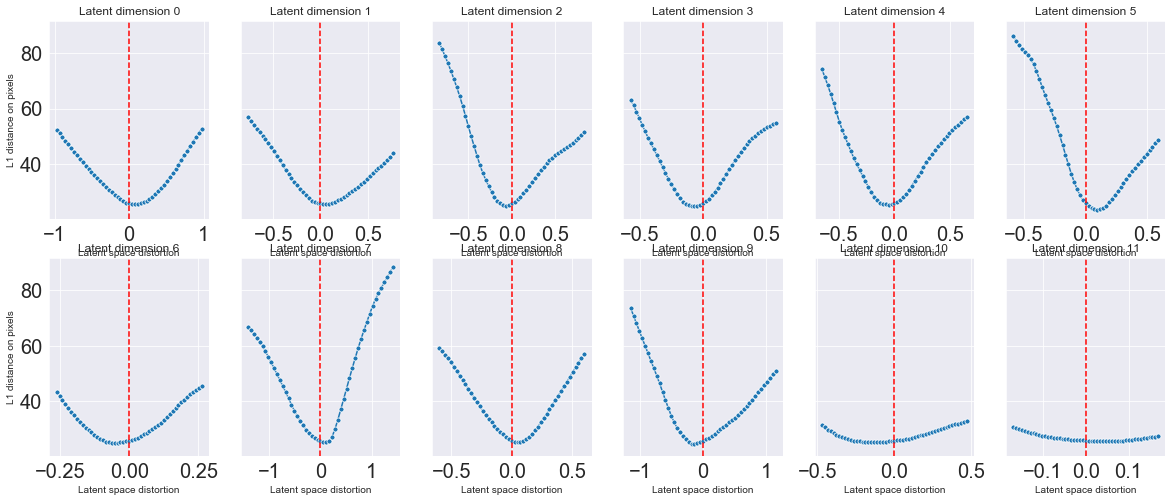

In [348]:
#single sample at multiple distortion levels
device = handler.device
steps = 51
N = 50

idx = torch.randperm(visualiser.test_input.shape[0])[:N]
base_vecs = visualiser.test_input[idx]
# encode - apply distortion - decode
with torch.no_grad():
    codes = visualiser.model.encode_mu(base_vecs.to(device), update_prior=True)
    ranges = visualiser.model.get_prior_range() # (min, max) for each dimension
widths = [(M-m)/2 for (m,M) in ranges]
distortion_levels = [np.linspace(-w,+w,steps) for w in widths]

z = codes[5]
x = base_vecs[5]
losses = visualiser.do_latent_distortion_multi_dim(z, distortion_levels, x, device=device)
losses = losses.cpu().numpy()


D = len(distortion_levels)
nrows = 2; ncols = D//nrows +1 if D%nrows!=0 else D//nrows
sns.set_style('darkgrid')
markersize=10
font_scale=20
ylim=None
xlim=None

fig, ax = plt.subplots(nrows, ncols, sharey=True, figsize=(20,8))
dim=0
for row in range(nrows):
    for col in range(ncols):
        if dim==D: break
        Nlosses = losses[dim,:] # steps
        ax[row,col].set_title(f"Latent dimension {dim}")
        # x = distortion level ; y = loss x step
        axi = sns.lineplot(distortion_levels[dim], Nlosses,
                           ax=ax[row,col], marker=".", markersize=markersize)
        ax[row,col].axvline(0, color='r', linestyle="--")
        axi.set(ylabel='L1 distance on pixels', xlabel='Latent space distortion')
        axi.tick_params(axis="x", labelsize=font_scale)
        axi.tick_params(axis="y", labelsize=font_scale)
        if ylim is not None: axi.set(ylim=(0, ylim))
        if xlim is not None: axi.set(xlim=(-xlim, xlim))
        dim+=1

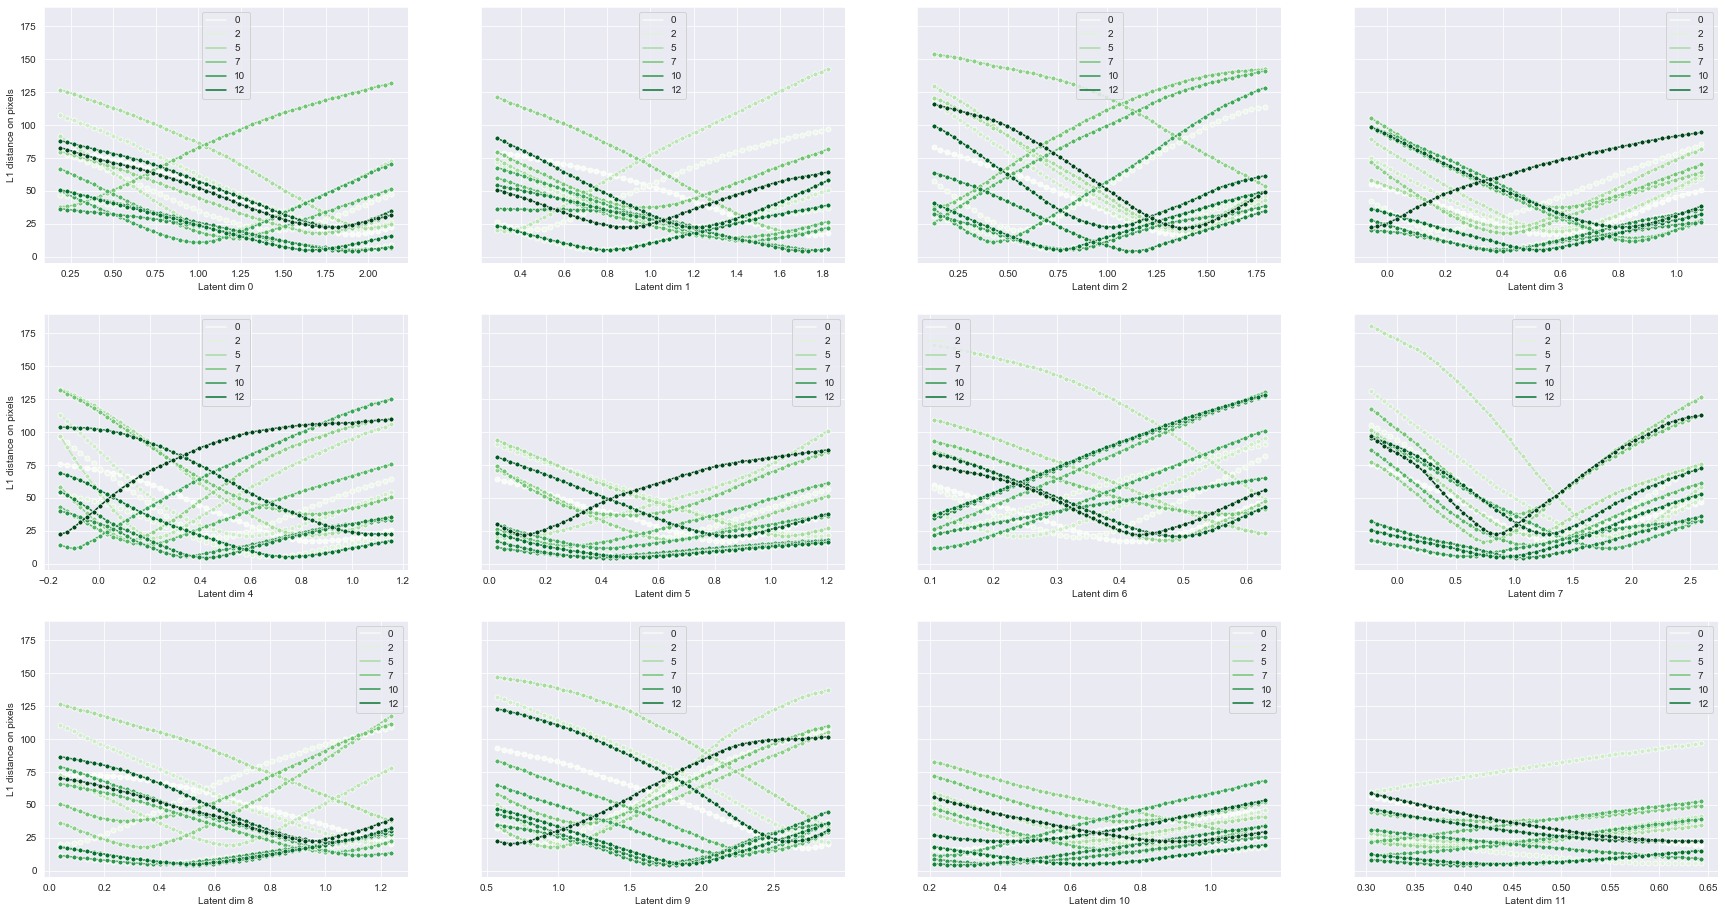

In [84]:
# single sample with marginal
device = handler.device
steps = 51
N = 15

idx = torch.randperm(visualiser.test_input.shape[0])[:50]
base_vecs = visualiser.test_input[idx[:N]]
# encode - apply distortion - decode
with torch.no_grad():
    codes = visualiser.model.encode_mu(base_vecs.to(device), update_prior=True)
    ranges = visualiser.model.get_prior_range() # (min, max) for each dimension
    


#z = codes[30]
z2 = codes.cpu().numpy() 
#x = base_vecs[30]

distortion_levels = [[np.linspace(m-z[i],M-z[i],steps) for i,(m,M) in enumerate(ranges)] for z in z2]
distortion_levels = np.stack(distortion_levels) # N x D x steps
ys = []
for i in range(N):
    # losses is a list of floats
    losses = visualiser.do_latent_distortion_multi_dim(codes[i], distortion_levels[i], base_vecs[i], device=device)
    ys.append(losses)
ys = torch.stack(ys).cpu().numpy() # N x D x steps

D = len(distortion_levels[0])
nrows = 3; ncols = D//nrows +1 if D%nrows!=0 else D//nrows
sns.set_style('darkgrid')
markersize=10
font_scale=20
ylim=None
xlim=None

fig, ax = plt.subplots(nrows, ncols, sharey=True, figsize=(30,16))
dim=0
for row in range(nrows):
    for col in range(ncols):
        if dim==D: break
        Nlosses = ys[:,dim,:] # N x steps
        #ax[row,col].set_title(f"Latent dimension {dim}")
        # x = distortion level ; y = loss x step
        x = distortion_levels[:,dim,:] + np.expand_dims(z2[:,dim],1)
        hue = [i for i in range(N) for _ in range(steps)] # steps points per each
        axi = sns.lineplot(x.reshape(-1,), Nlosses.reshape(-1,),
                           ax=ax[row,col], marker=".", markersize=markersize, 
                           hue=hue, palette="Greens")
        #ax[row,col].axvline(z[dim], color='r', linestyle="--")
        axi.set(ylabel='L1 distance on pixels', xlabel=f'Latent dim {dim}')
        #axi.tick_params(axis="x", labelsize=font_scale)
        #axi.tick_params(axis="y", labelsize=font_scale)
        if ylim is not None: axi.set(ylim=(0, ylim))
        if xlim is not None: axi.set(xlim=(-xlim, xlim))
        dim+=1

tensor([[28.3459, 11.6706, 10.8708,  5.8397, 10.3431,  7.8408, -2.4163,  7.9203,
          5.0450, 27.1215,  9.5879,  9.3097],
        [15.8636, 11.4522,  6.5855, 16.3621,  5.2328, 20.2406,  2.9094, 25.9452,
         14.1413, 28.8381,  5.8358,  4.1370],
        [23.3204, 29.1821, 21.4060,  3.1829,  5.8502,  5.3460, -0.5921, 14.3953,
          6.7679, 31.1936,  3.0530,  3.6150]], device='cuda:0')


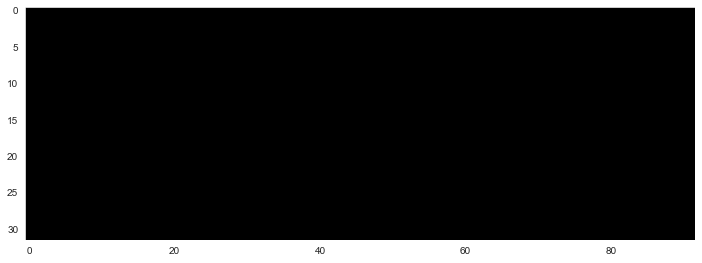

In [56]:
#extreme_latent = torch.Tensor(distortion_levels[0:3,:,21])
extreme_latent = codes[0:3]*(15)
print(extreme_latent)


with torch.no_grad():
    decoded = visualiser.model.decode(extreme_latent.to(device), activate=True)

grid_decoded = torchvision.utils.make_grid(decoded, nrow=3)
figure = plt.figure(figsize=(12,8))
plt.imshow(grid_decoded.permute(1, 2, 0).cpu().numpy())
plt.axis('on')
plt.grid(b=None)

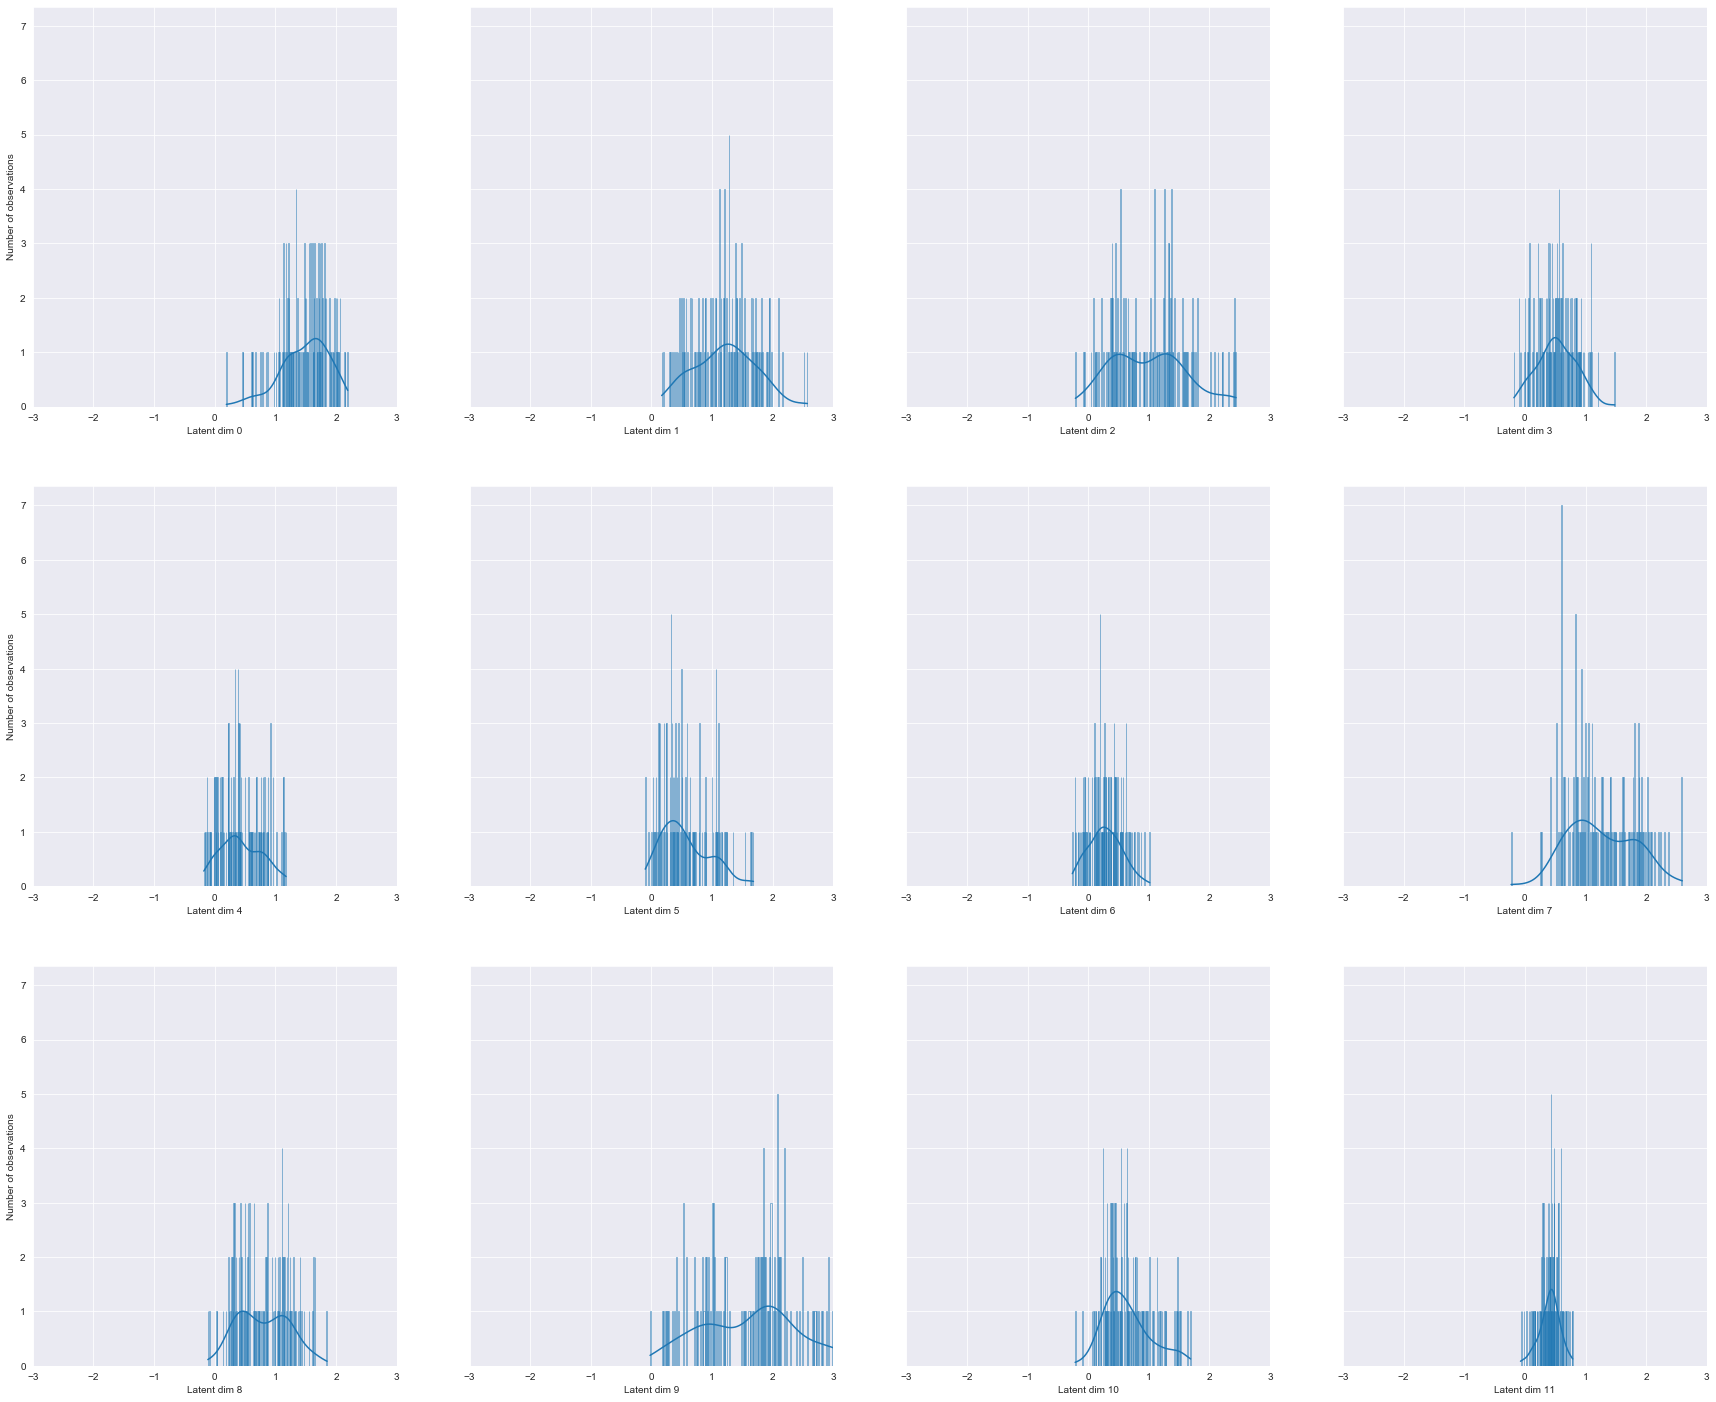

In [356]:
# plot the marginal 
# single sample with marginal
device = handler.device
steps = 51
N = 128

idx = torch.randperm(visualiser.test_input.shape[0])[:N]
base_vecs = visualiser.test_input[idx]
# encode - apply distortion - decode
with torch.no_grad():
    codes = visualiser.model.encode_mu(base_vecs.to(device), update_prior=True)
    ranges = visualiser.model.get_prior_range() # (min, max) for each dimension
    

D = codes.shape[1]
nrows = 3; ncols = D//nrows +1 if D%nrows!=0 else D//nrows
font_scale=20
ylim=None
xlim=3

fig, ax = plt.subplots(nrows, ncols, sharey=True, figsize=(30,25))
dim=0
for row in range(nrows):
    for col in range(ncols):
        if dim==D: break
        axi = sns.histplot(codes[:,dim].cpu().numpy(), ax=ax[row,col], kde=True, bins=200, fill=False)
        #ax[row,col].axvline(z[dim], color='r', linestyle="--")
        axi.set(ylabel='Number of observations', xlabel=f'Latent dim {dim}')
        #axi.tick_params(axis="x", labelsize=font_scale)
        #axi.tick_params(axis="y", labelsize=font_scale)
        if xlim is not None: axi.set(xlim=(-xlim, xlim))
        dim+=1

<Figure size 2160x1800 with 0 Axes>

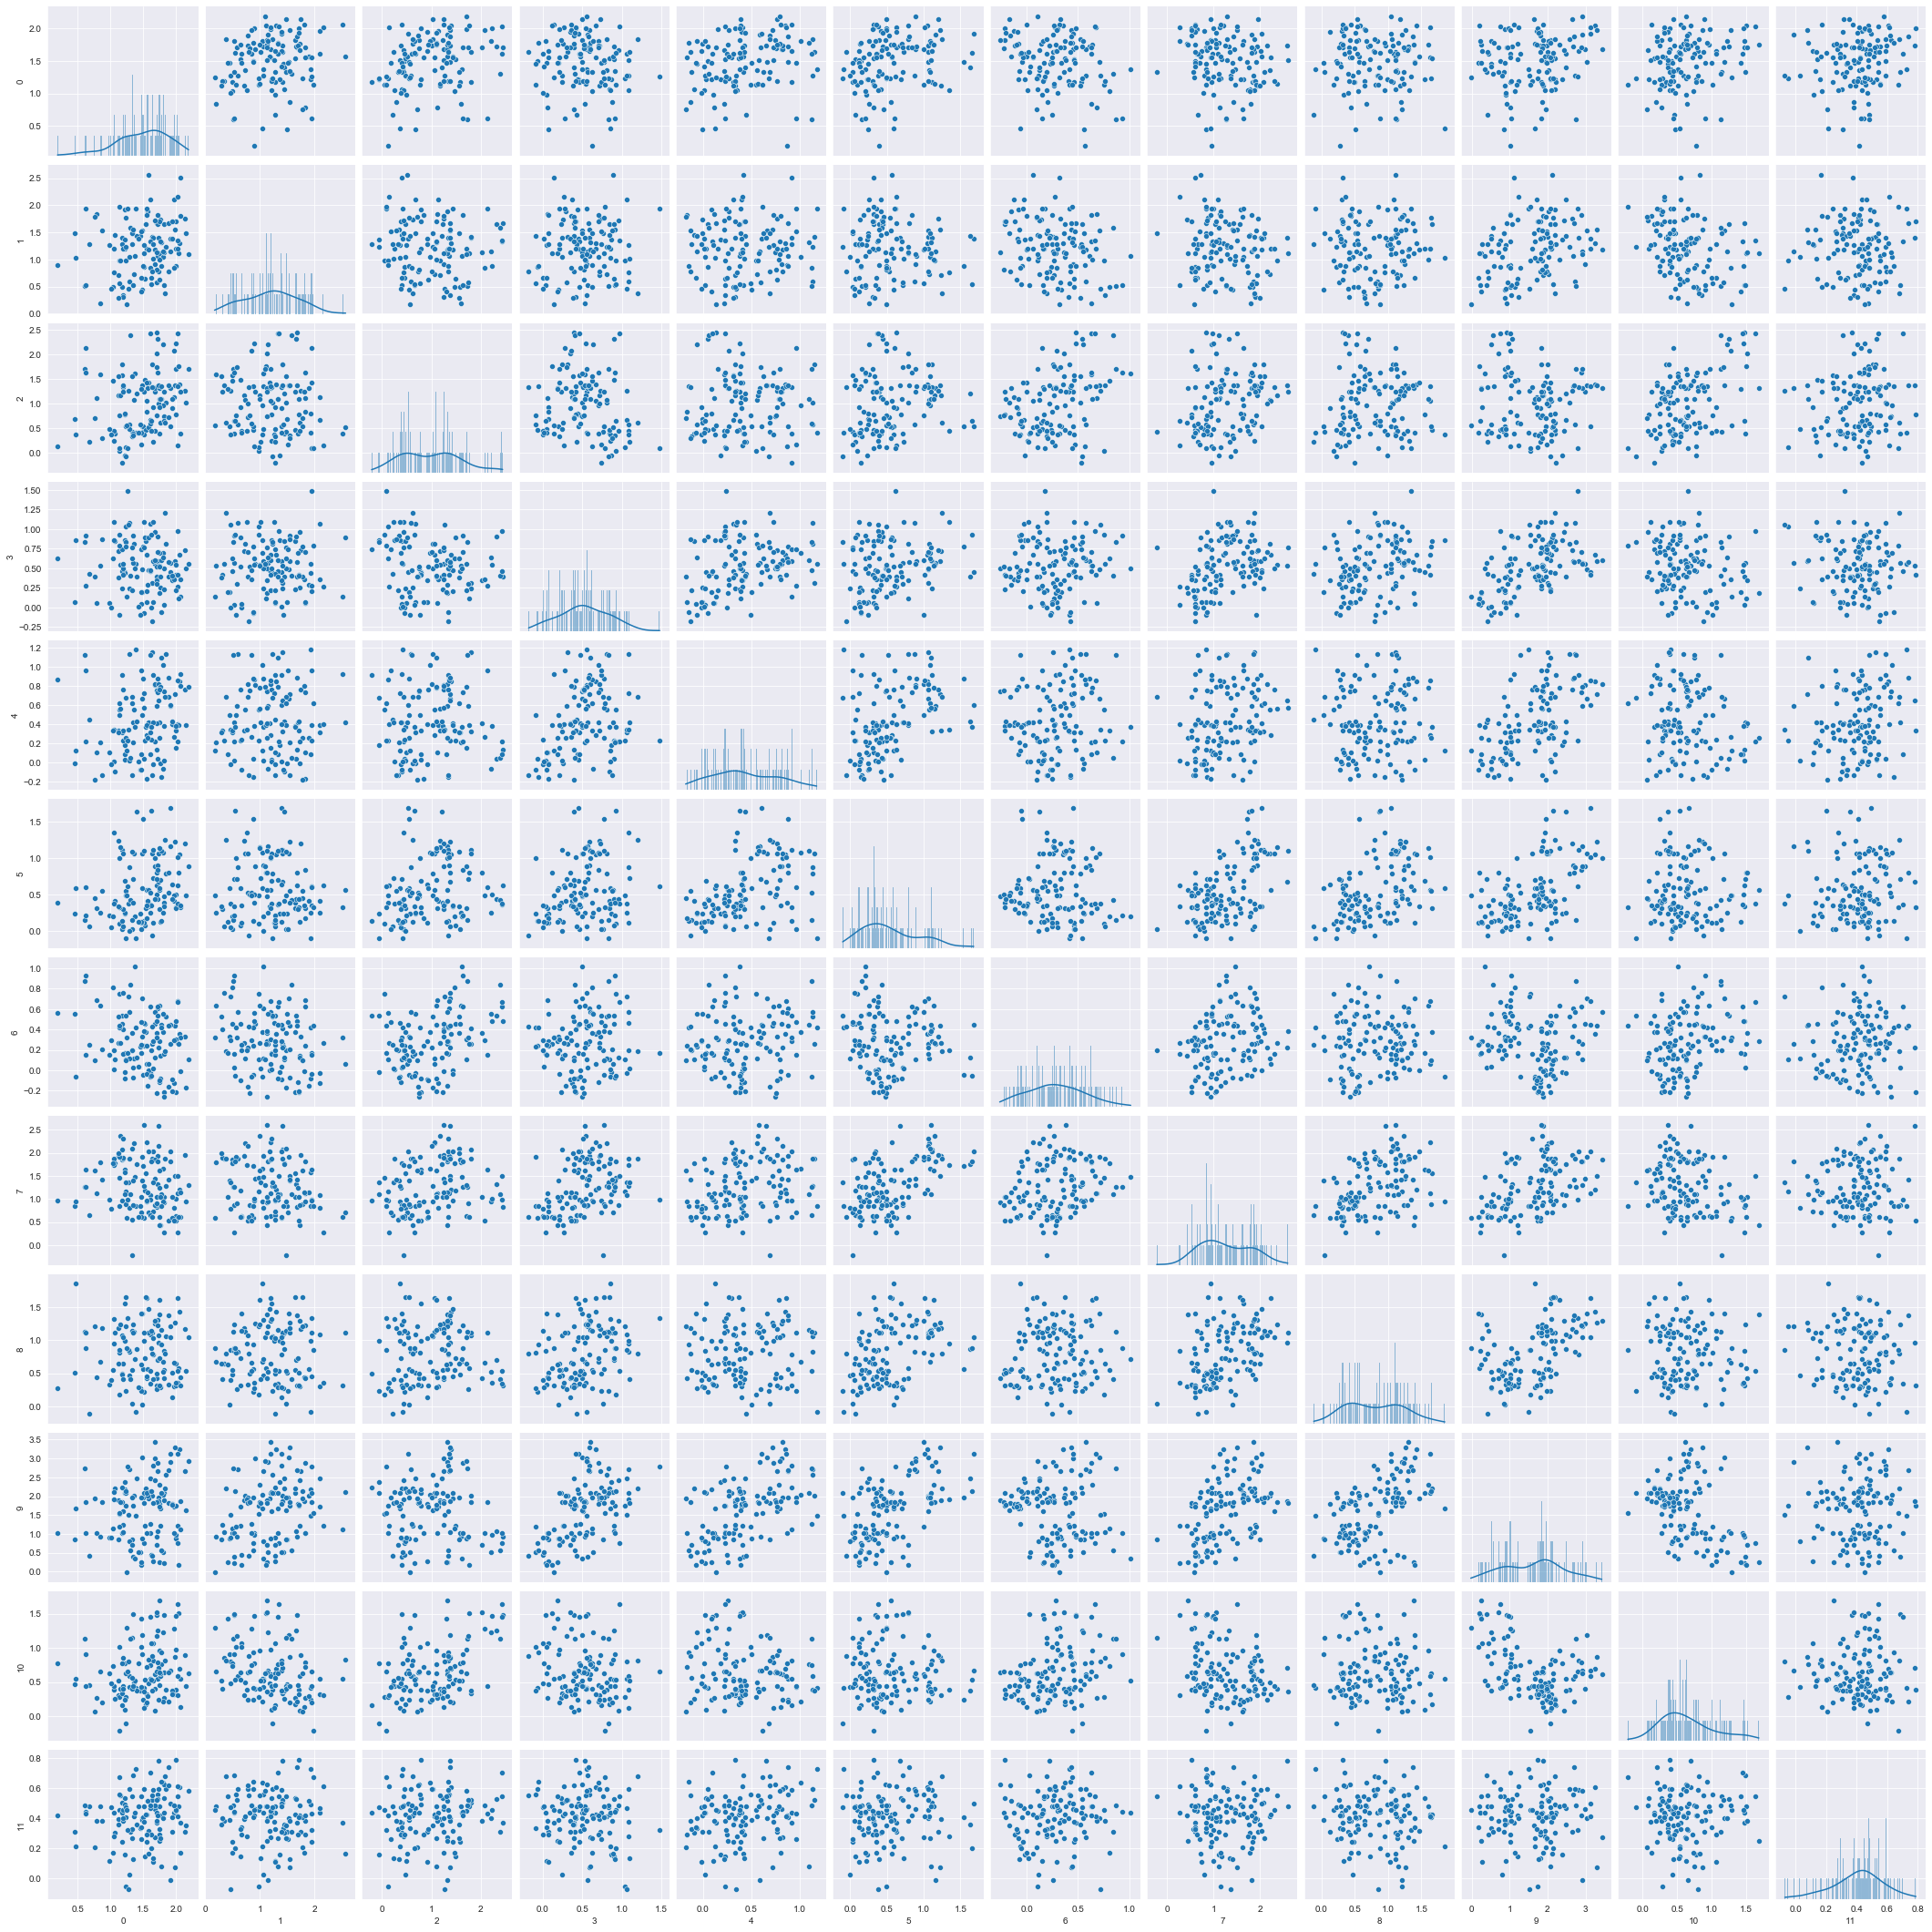

In [354]:
# plot the marginal 
# single sample with marginal
device = handler.device
steps = 51
N = 128

idx = torch.randperm(visualiser.test_input.shape[0])[:N]
base_vecs = visualiser.test_input[idx]
# encode - apply distortion - decode
with torch.no_grad():
    codes = visualiser.model.encode_mu(base_vecs.to(device), update_prior=True)
    ranges = visualiser.model.get_prior_range() # (min, max) for each dimension
    

fig = plt.figure(figsize=(30,25))
axi = sns.pairplot(pd.DataFrame(codes.cpu().numpy()), diag_kws = {'bins':200, 'kde':True})

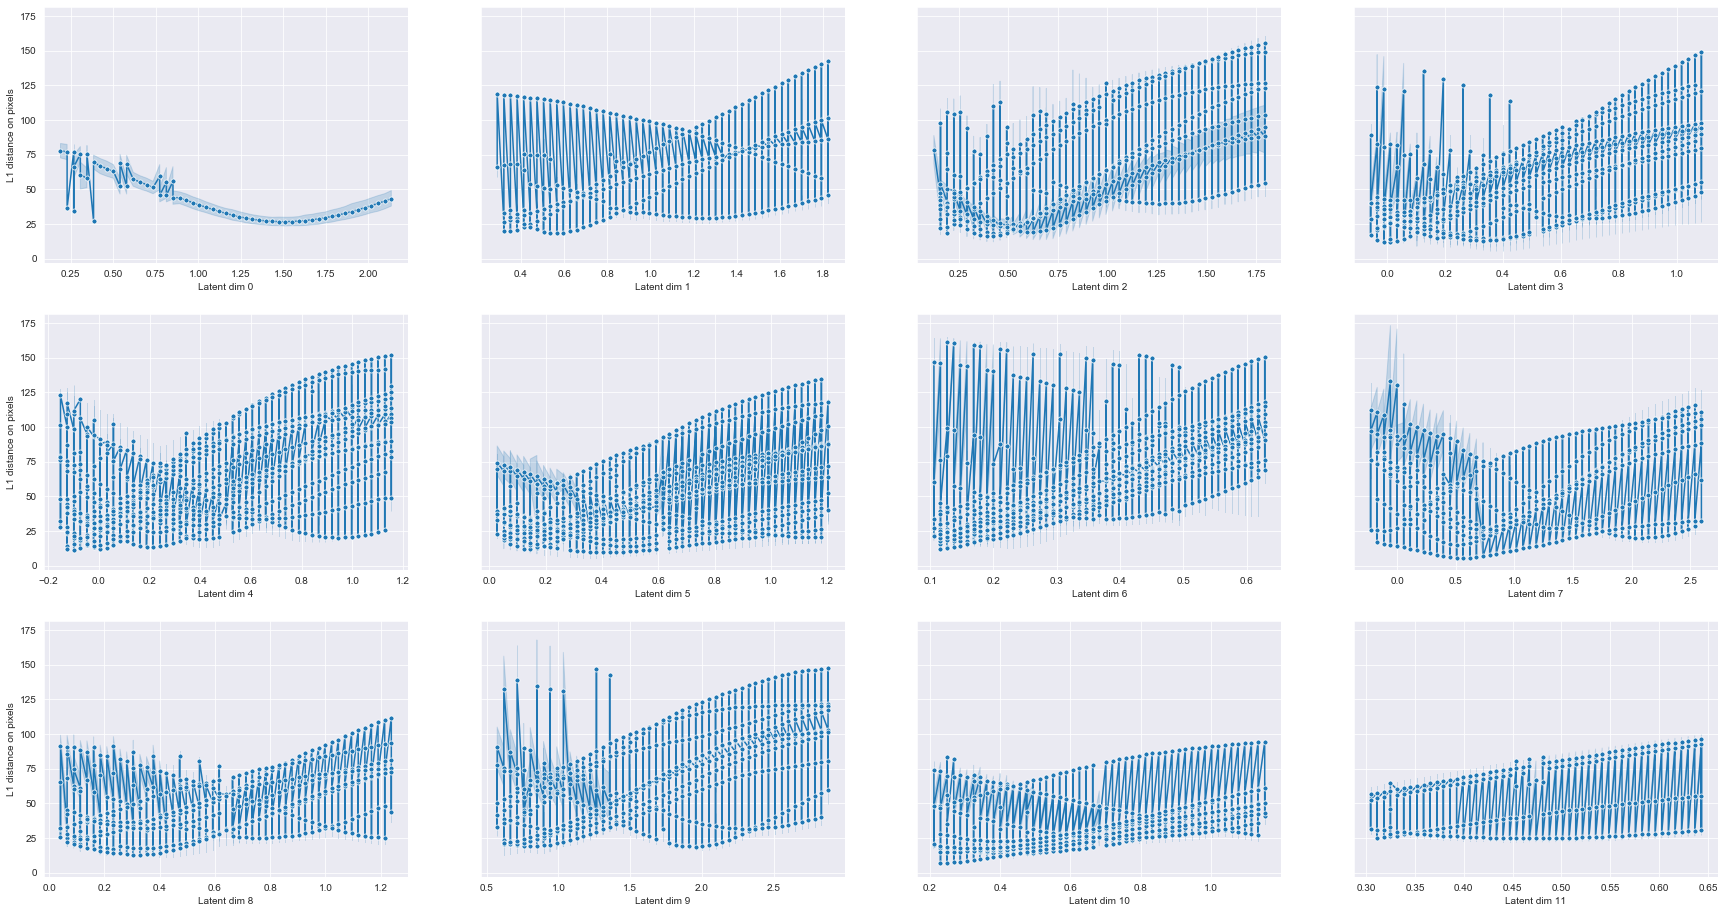

In [22]:
# single sample with marginal
device = handler.device
steps = 51
N = 50

idx = torch.randperm(visualiser.test_input.shape[0])[:50]
base_vecs = visualiser.test_input[idx[:N]]
# encode - apply distortion - decode
with torch.no_grad():
    codes = visualiser.model.encode_mu(base_vecs.to(device), update_prior=True)
    ranges = visualiser.model.get_prior_range() # (min, max) for each dimension
    


#z = codes[30]
z2 = codes.cpu().numpy() 
#x = base_vecs[30]

distortion_levels = [[np.linspace(m-z[i],M-z[i],steps) for i,(m,M) in enumerate(ranges)] for z in z2]
distortion_levels = np.stack(distortion_levels) # N x D x steps
ys = []
for i in range(N):
    # losses is a list of floats
    losses = visualiser.do_latent_distortion_multi_dim(codes[i], distortion_levels[i], base_vecs[i], device=device)
    ys.append(losses)
ys = torch.stack(ys).cpu().numpy() # N x D x steps

D = len(distortion_levels[0])
nrows = 3; ncols = D//nrows +1 if D%nrows!=0 else D//nrows
sns.set_style('darkgrid')
markersize=10
font_scale=20
ylim=None
xlim=None

fig, ax = plt.subplots(nrows, ncols, sharey=True, figsize=(30,16))
dim=0
for row in range(nrows):
    for col in range(ncols):
        if dim==D: break
        Nlosses = ys[:,dim,:] # N x steps
        #ax[row,col].set_title(f"Latent dimension {dim}")
        # x = distortion level ; y = loss x step
        x = distortion_levels[:,dim,:] + np.expand_dims(z2[:,dim],1)
        hue = [i for i in range(N) for _ in range(steps)] # steps points per each
        axi = sns.lineplot(x.reshape(-1,), Nlosses.reshape(-1,),
                           ax=ax[row,col], marker=".", markersize=markersize)
        #ax[row,col].axvline(z[dim], color='r', linestyle="--")
        axi.set(ylabel='L1 distance on pixels', xlabel=f'Latent dim {dim}')
        #axi.tick_params(axis="x", labelsize=font_scale)
        #axi.tick_params(axis="y", labelsize=font_scale)
        if ylim is not None: axi.set(ylim=(0, ylim))
        if xlim is not None: axi.set(xlim=(-xlim, xlim))
        dim+=1

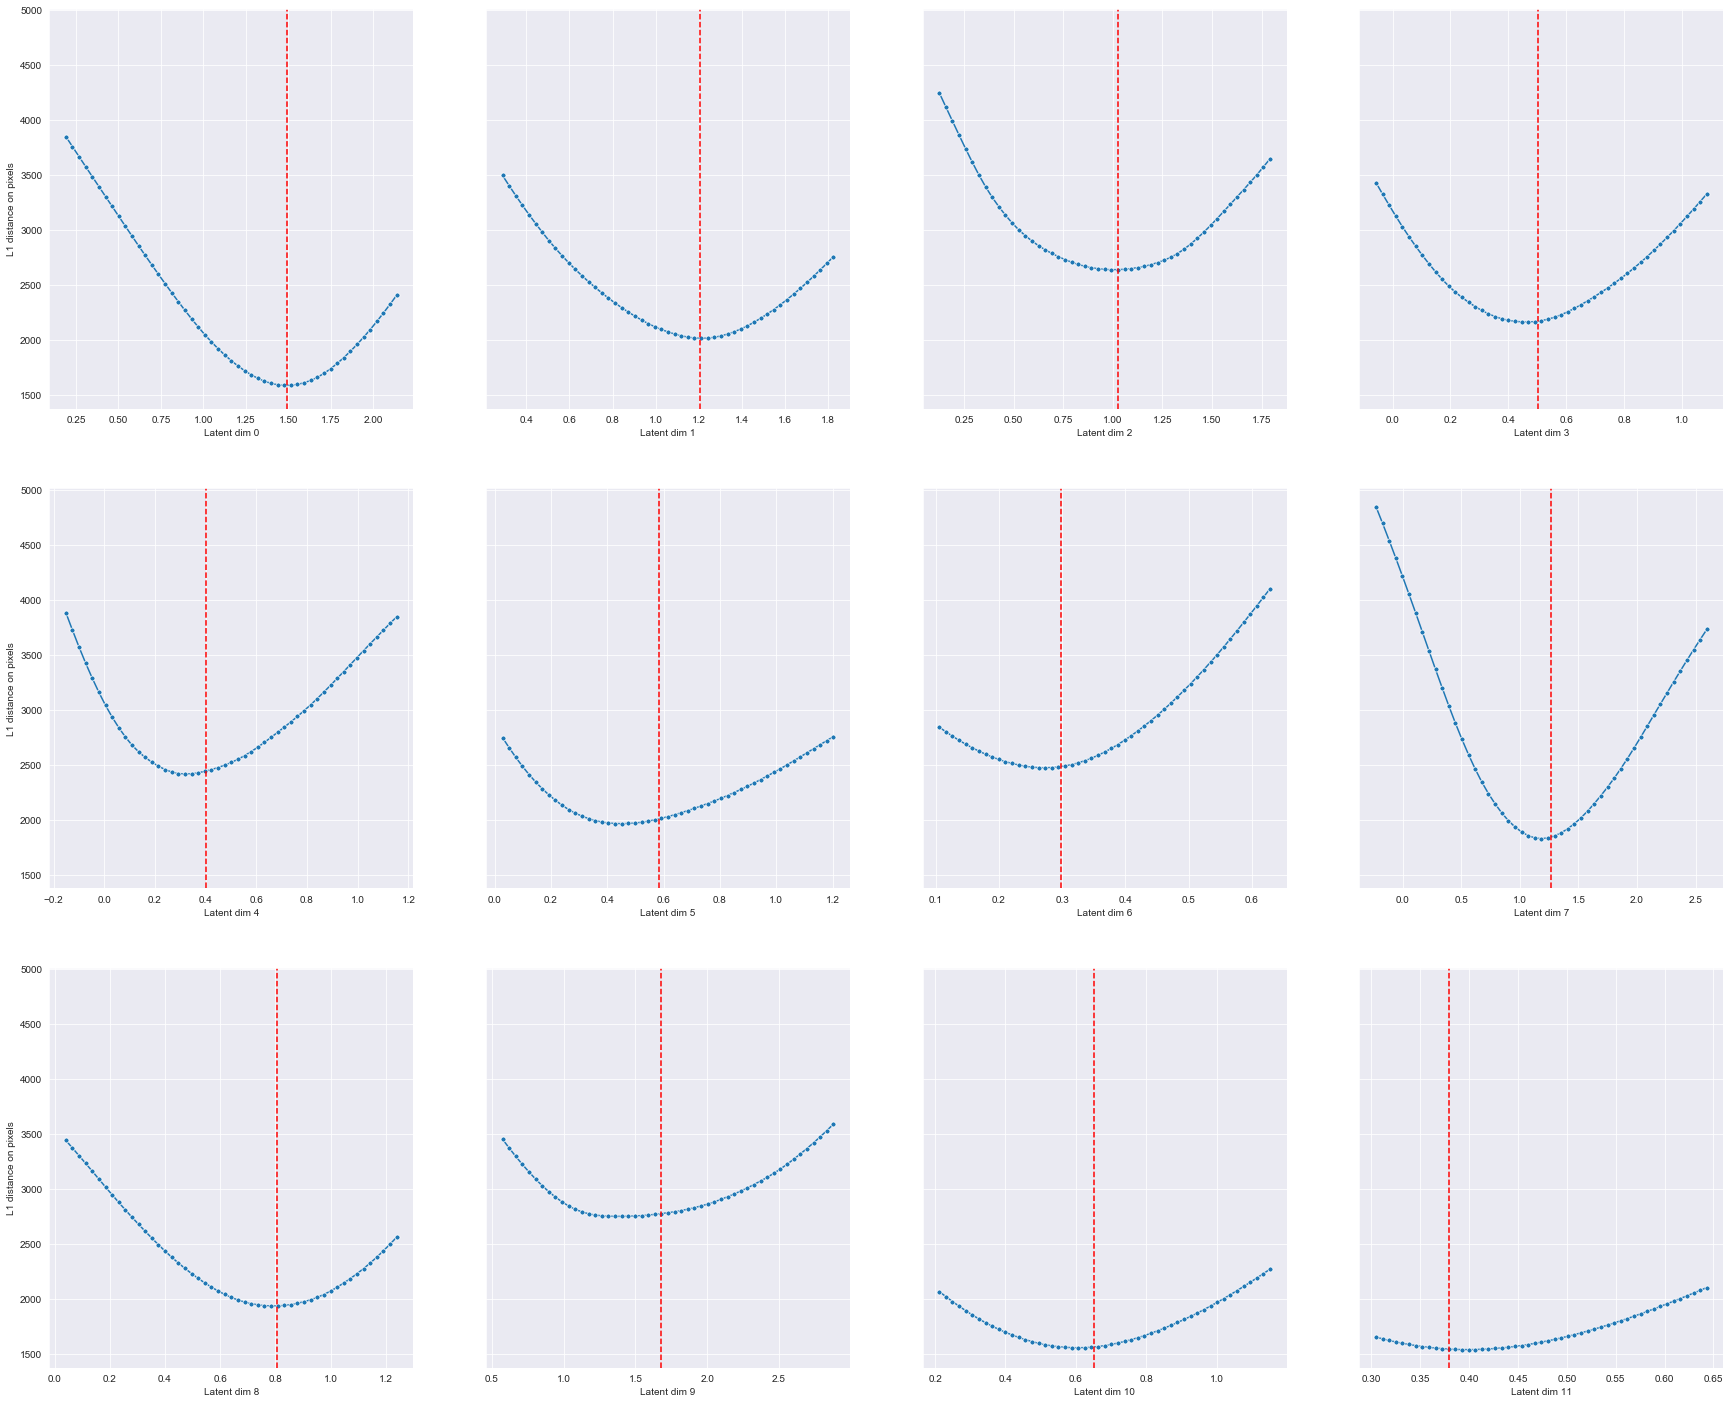

In [20]:
# single sample with marginal
device = handler.device
steps = 51
N = 50

idx = torch.randperm(visualiser.test_input.shape[0])[:50]
base_vecs = visualiser.test_input[idx[:N]]
# encode - apply distortion - decode
with torch.no_grad():
    codes = visualiser.model.encode_mu(base_vecs.to(device), update_prior=True)
    ranges = visualiser.model.get_prior_range() # (min, max) for each dimension
    


#z = codes[30]
z2 = codes.cpu().numpy() 
#x = base_vecs[30]

distortion_levels = [[np.linspace(m-z[i],M-z[i],steps) for i,(m,M) in enumerate(ranges)] for z in z2]
distortion_levels = np.stack(distortion_levels) # N x D x steps
ys = []
for i in range(N):
    # losses is a list of floats
    losses = visualiser.do_latent_distortion_multi_dim(codes[i], distortion_levels[i], base_vecs[i], device=device)
    ys.append(losses)
ys = torch.stack(ys).cpu().numpy() # N x D x steps

D = len(distortion_levels[0])
nrows = 3; ncols = D//nrows +1 if D%nrows!=0 else D//nrows
sns.set_style('darkgrid')
markersize=10
font_scale=20
ylim=None
xlim=None

fig, ax = plt.subplots(nrows, ncols, sharey=True, figsize=(30,25))
dim=0
for row in range(nrows):
    for col in range(ncols):
        if dim==D: break
        Nlosses = np.sum(ys[:,dim,:], axis=0) # steps
        #ax[row,col].set_title(f"Latent dimension {dim}")
        x = distortion_levels[0,dim,:] + z2[0,dim]
        axi = sns.lineplot(x, Nlosses, ax=ax[row,col], marker=".", markersize=markersize)
        ax[row,col].axvline(np.mean(z2[:,dim]), color='r', linestyle="--")
        axi.set(ylabel='L1 distance on pixels', xlabel=f'Latent dim {dim}')
        #axi.tick_params(axis="x", labelsize=font_scale)
        #axi.tick_params(axis="y", labelsize=font_scale)
        if ylim is not None: axi.set(ylim=(0, ylim))
        if xlim is not None: axi.set(xlim=(-xlim, xlim))
        dim+=1

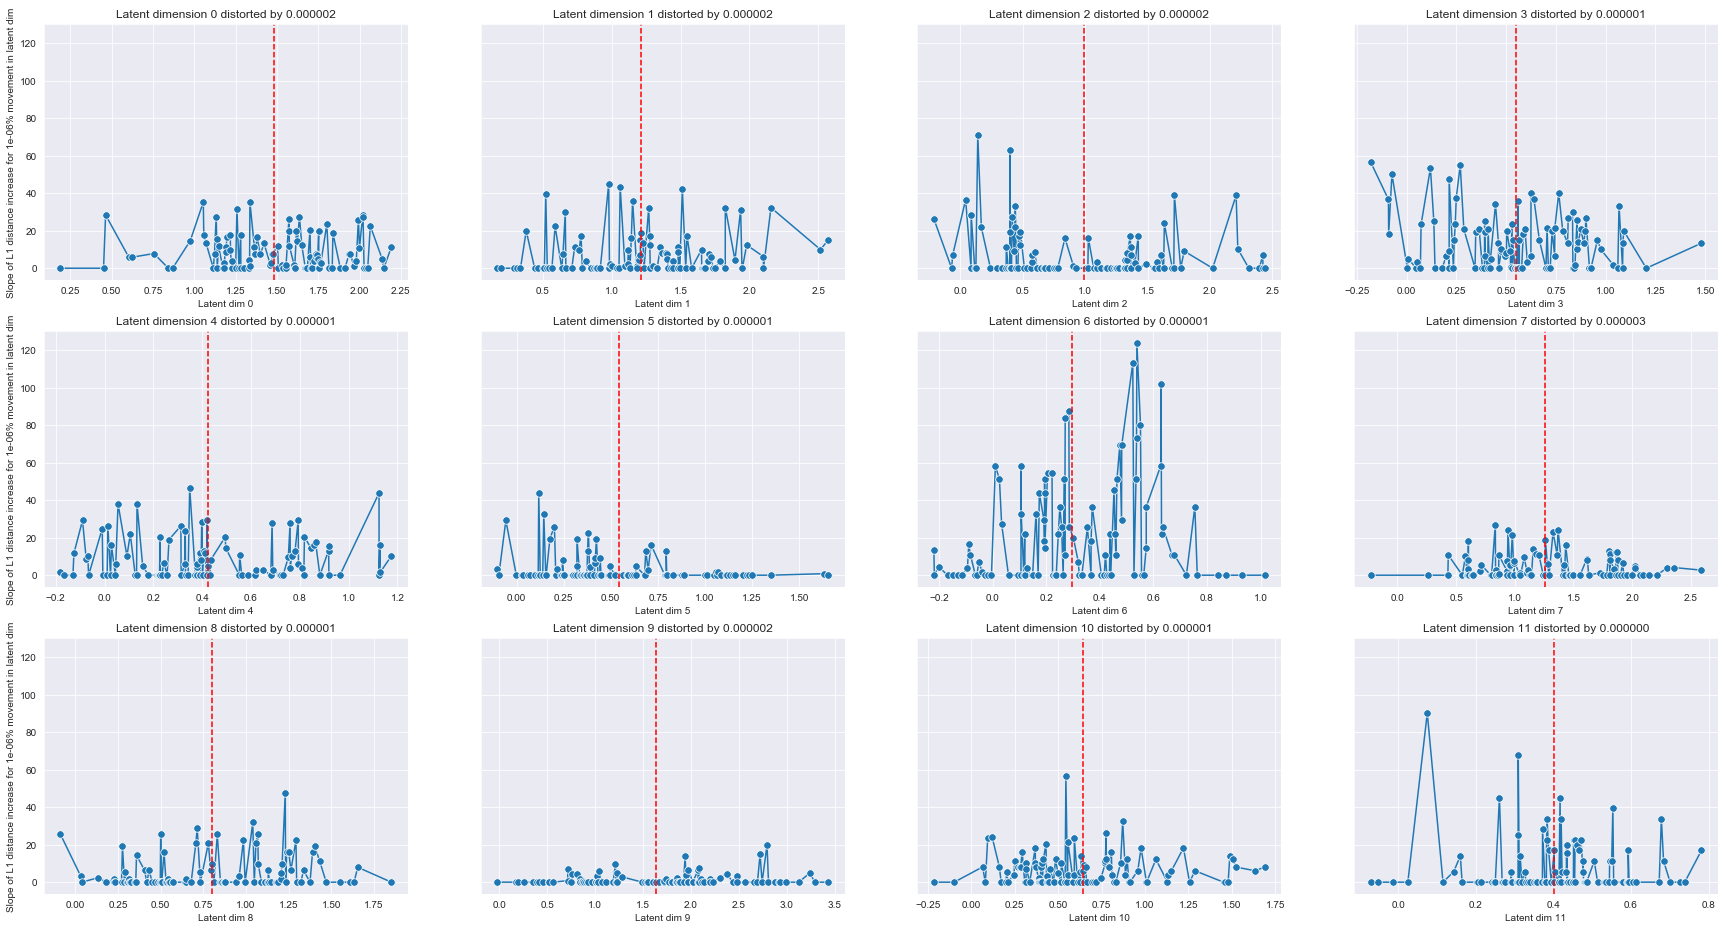

In [171]:
# fixed distortion level effect over latent space
device = handler.device
steps = 51
N = 100
relative=True

idx = torch.randperm(visualiser.test_input.shape[0])[:N]
base_vecs = visualiser.test_input[idx[:N]]
# encode - apply distortion - decode
with torch.no_grad():
    codes = visualiser.model.encode_mu(base_vecs.to(device), update_prior=True)
    ranges = visualiser.model.get_prior_range() # (min, max) for each dimension
    


#z = codes[30]
z2 = codes.cpu().numpy() 
#x = base_vecs[30]

ro = 10e-7
distortions = [ro*(M-m) for (m,M) in ranges] # D x 1
D = len(ranges)

ys = []
for i in range(D):
    new_codes = codes.clone()
    new_codes[:,i] += distortions[i]
    with torch.no_grad():
        recons = visualiser.model.decode(new_codes.to(device), activate=True) # N x image_dim
        diff = recons - base_vecs.to(device) # N x image_dim
        losses = torch.norm(diff, 1, dim=tuple(range(diff.dim())[1:])) # N x 1
    new_codes[:,i] -= distortions[i]
    with torch.no_grad():
        recons = visualiser.model.decode(new_codes.to(device), activate=True) # N x image_dim
        diff = recons - base_vecs.to(device) # N x image_dim
        new_losses = torch.norm(diff, 1, dim=tuple(range(diff.dim())[1:]))
        losses = torch.max(torch.stack([losses, new_losses]), dim=0)[0] # N x 1
    ys.append(losses)
ys = torch.stack(ys).cpu().numpy() # D x N 

with torch.no_grad():
    base_recons = visualiser.model.decode(codes.to(device), activate=True) # N x image_dim
    base_diff = base_recons - base_vecs.to(device) # N x image_dim
    base_losses = torch.norm(base_diff, 1, dim=tuple(range(diff.dim())[1:])).cpu().numpy() # N x 1

    
nrows = 3; ncols = D//nrows +1 if D%nrows!=0 else D//nrows
sns.set_style('darkgrid')
markersize=15
font_scale=20
ylim=None
xlim=None

fig, ax = plt.subplots(nrows, ncols, sharey=True, figsize=(30,16))
dim=0
for row in range(nrows):
    for col in range(ncols):
        if dim==D: break
        ax[row,col].set_title(f"Latent dimension {dim} distorted by {distortions[dim]:.6f}")
        x = codes[:,dim].cpu().numpy() # N x 1
        Nlosses = ys[dim,:] # N x 1
        if not relative:
            all_losses = np.hstack([Nlosses,base_losses])
            all_x = np.tile(x,2)
            hue = [i for i in range(2) for _ in range(N)]
        else: 
            all_losses = (Nlosses - base_losses)/distortions[dim]
            all_x = x 
            hue = None
        axi = sns.lineplot(all_x, all_losses, ax=ax[row,col], 
                           marker=".", markersize=markersize, 
                           hue=hue, palette="Blues")
        if not relative: axi.legend(labels=['+ distortion', 'base loss'])
        ax[row,col].axvline(np.mean(x), color='r', linestyle="--")
        axi.set(ylabel=f'Slope of L1 distance increase for {ro}% movement in latent dim', 
                xlabel=f'Latent dim {dim}')
        #axi.tick_params(axis="x", labelsize=font_scale)
        #axi.tick_params(axis="y", labelsize=font_scale)
        if ylim is not None: axi.set(ylim=(0, ylim))
        if xlim is not None: axi.set(xlim=(-xlim, xlim))
        dim+=1

In [317]:
# continuity score - or better: specificity of dimension 
def compute_output_distortion(model, latents, originals, device):
    with torch.no_grad():
        recons = model.decode(latents.to(device), activate=True) # N x image_dim
        diff = recons - originals.to(device) # N x image_dim
        loss = torch.norm(diff, 1, dim=tuple(range(diff.dim())[1:])) # N x 1
    return loss
    

def compute_max_loss(model, codes, distortions, originals, dim, device):
    #TODO: clean
    new_codes = codes.clone()
    # positive distortion
    new_codes[:,dim] += distortions[dim]
    losses = compute_output_distortion(model, new_codes, originals, device)
    # negative distortion
    new_codes = codes.clone()
    new_codes[:,dim] -= distortions[dim]
    new_losses = compute_output_distortion(model, new_codes, originals, device)
    losses = torch.max(torch.stack([losses, new_losses]), dim=0)[0] # N x 1
    return losses 

def total_relative_effect(codes, ranges, base_losses, model, originals, device, ro, dim):
    # single sample with marginal
    distortions = [ro*(M-m) for (m,M) in ranges]
    ys = compute_max_loss(model, codes, distortions, originals, dim=i, device=device).cpu().numpy() # N x 1
    total_effects = np.mean(ys - base_losses)/distortions[i]
    return total_effects

def total_effects(codes, ranges, base_losses, model, originals, device, ro, dim):
    # single sample with marginal
    distortions = [ro*(M-m) for (m,M) in ranges]
    ys = compute_max_loss(model, codes, distortions, originals, dim=i, device=device).cpu().numpy() # N x 1
    return (ys - base_losses)/distortions[i]

In [299]:
device = handler.device
steps = 51
N = 100

idx = torch.randperm(visualiser.test_input.shape[0])[:N]
base_vecs = visualiser.test_input[idx[:N]]
# encode - apply distortion - decode
with torch.no_grad():
    codes = visualiser.model.encode_mu(base_vecs.to(device), update_prior=True)
    ranges = visualiser.model.get_prior_range() # (min, max) for each dimension
base_losses = compute_output_distortion(visualiser.model, codes, base_vecs, device=device).cpu().numpy()


levels = np.geomspace(10e-10,0.5, num=60, endpoint=True)
latents_effects = []
for i in range(codes.shape[1]):
    effects = []
    print(f"Searching dimension {i}")
    for l in reversed(levels): 
        eff = total_relative_effect(codes, ranges, base_losses, visualiser.model, base_vecs, device, ro=l, dim=i)
        effects.append(eff)  
    latents_effects.append(effects) 


Searching dimension 0
Searching dimension 1
Searching dimension 2
Searching dimension 3
Searching dimension 4
Searching dimension 5
Searching dimension 6
Searching dimension 7
Searching dimension 8
Searching dimension 9
Searching dimension 10
Searching dimension 11


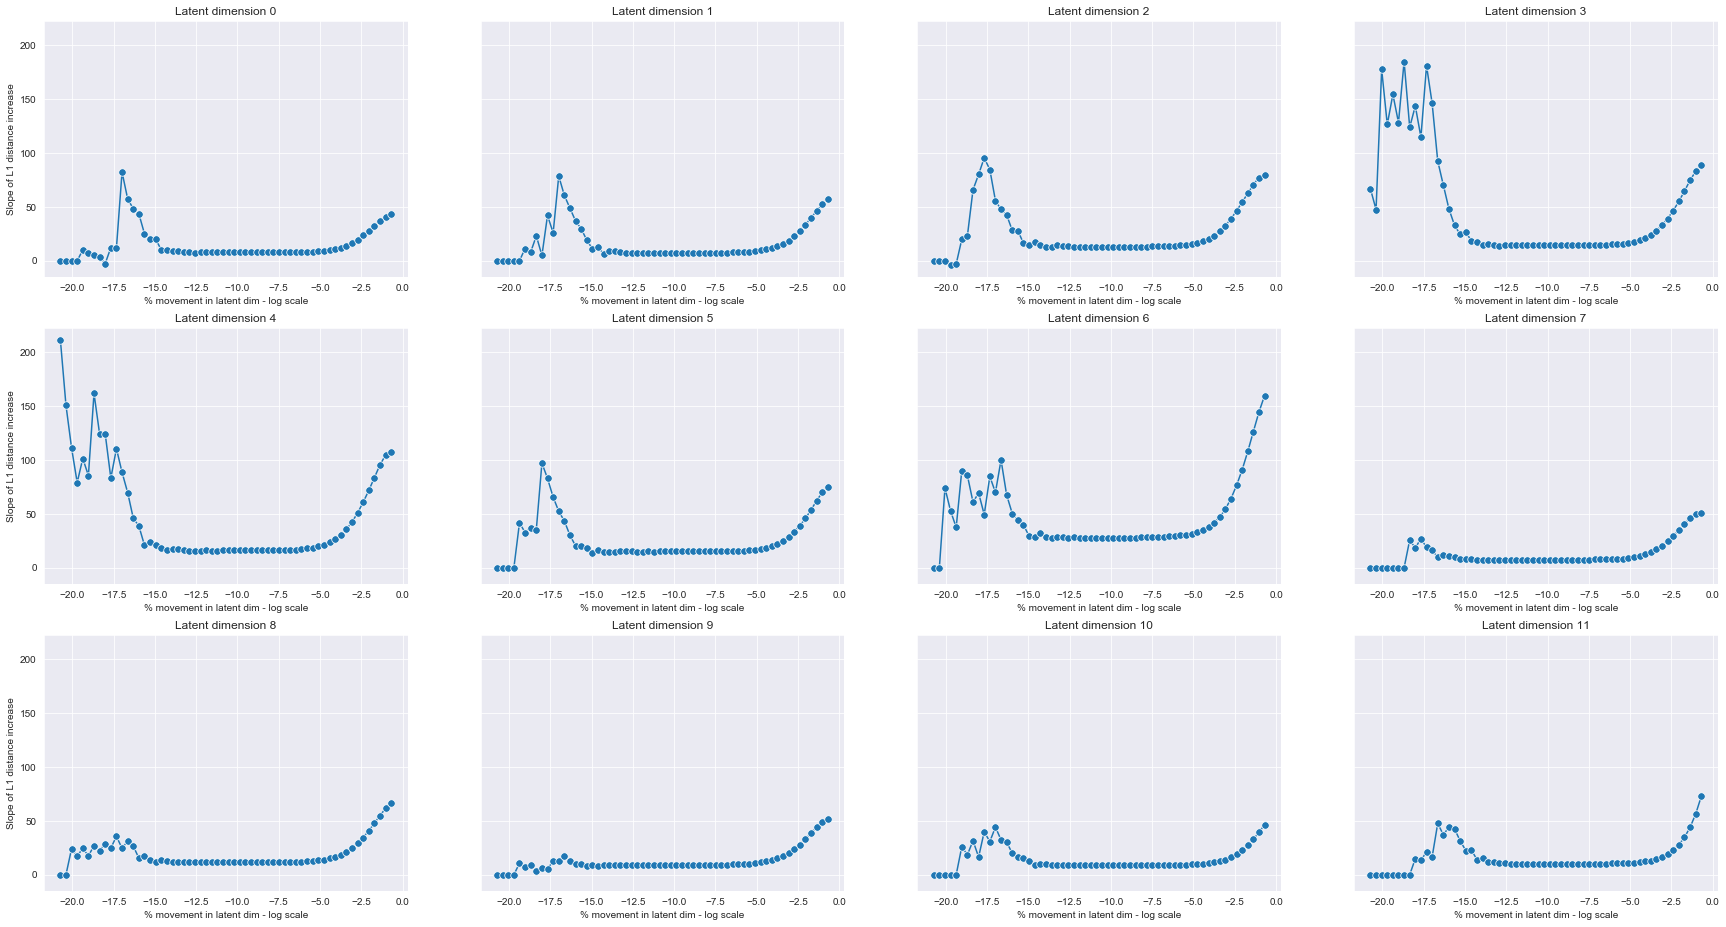

In [300]:
D = codes.shape[1]
nrows = 3; ncols = D//nrows +1 if D%nrows!=0 else D//nrows
sns.set_style('darkgrid')
markersize=15
font_scale=20
ylim=None
xlim=None

fig, ax = plt.subplots(nrows, ncols, sharey=True, figsize=(30,16))
dim=0
for row in range(nrows):
    for col in range(ncols):
        if dim==D: break
        ax[row,col].set_title(f"Latent dimension {dim}")
        x = np.log(np.array(list(reversed(levels))))
        y = latents_effects[dim] 
        axi = sns.lineplot(x, y, ax=ax[row,col], 
                           marker=".", markersize=markersize)
        axi.set(ylabel=f'Slope of L1 distance increase', 
                xlabel='% movement in latent dim - log scale')
        #axi.set_xticklabels([f'{i:.2f}' for i in (levels)])
        #axi.tick_params(axis="x", labelsize=font_scale)
        #axi.tick_params(axis="y", labelsize=font_scale)
        if ylim is not None: axi.set(ylim=(0, ylim))
        if xlim is not None: axi.set(xlim=(-xlim, xlim))
        dim+=1

In [318]:
device = handler.device
steps = 51
N = 100

idx = torch.randperm(visualiser.test_input.shape[0])[:N]
base_vecs = visualiser.test_input[idx[:N]]
# encode - apply distortion - decode
with torch.no_grad():
    codes = visualiser.model.encode_mu(base_vecs.to(device), update_prior=True)
    ranges = visualiser.model.get_prior_range() # (min, max) for each dimension
base_losses = compute_output_distortion(visualiser.model, codes, base_vecs, device=device).cpu().numpy()


levels = np.geomspace(10e-10,0.5, num=60, endpoint=True)
latents_effects = [] # D x N x num_levels
for i in range(codes.shape[1]):
    effects = [] # N x num levels
    print(f"Searching dimension {i}")
    for l in reversed(levels): 
        eff = total_effects(codes, ranges, base_losses, visualiser.model, base_vecs, device, ro=l, dim=i)
        effects.append(eff)  
    latents_effects.append(np.stack(effects)) 
latents_effects = np.stack(latents_effects)


Searching dimension 0
Searching dimension 1
Searching dimension 2
Searching dimension 3
Searching dimension 4
Searching dimension 5
Searching dimension 6
Searching dimension 7
Searching dimension 8
Searching dimension 9
Searching dimension 10
Searching dimension 11


In [319]:
latents_effects.shape

(12, 60, 100)

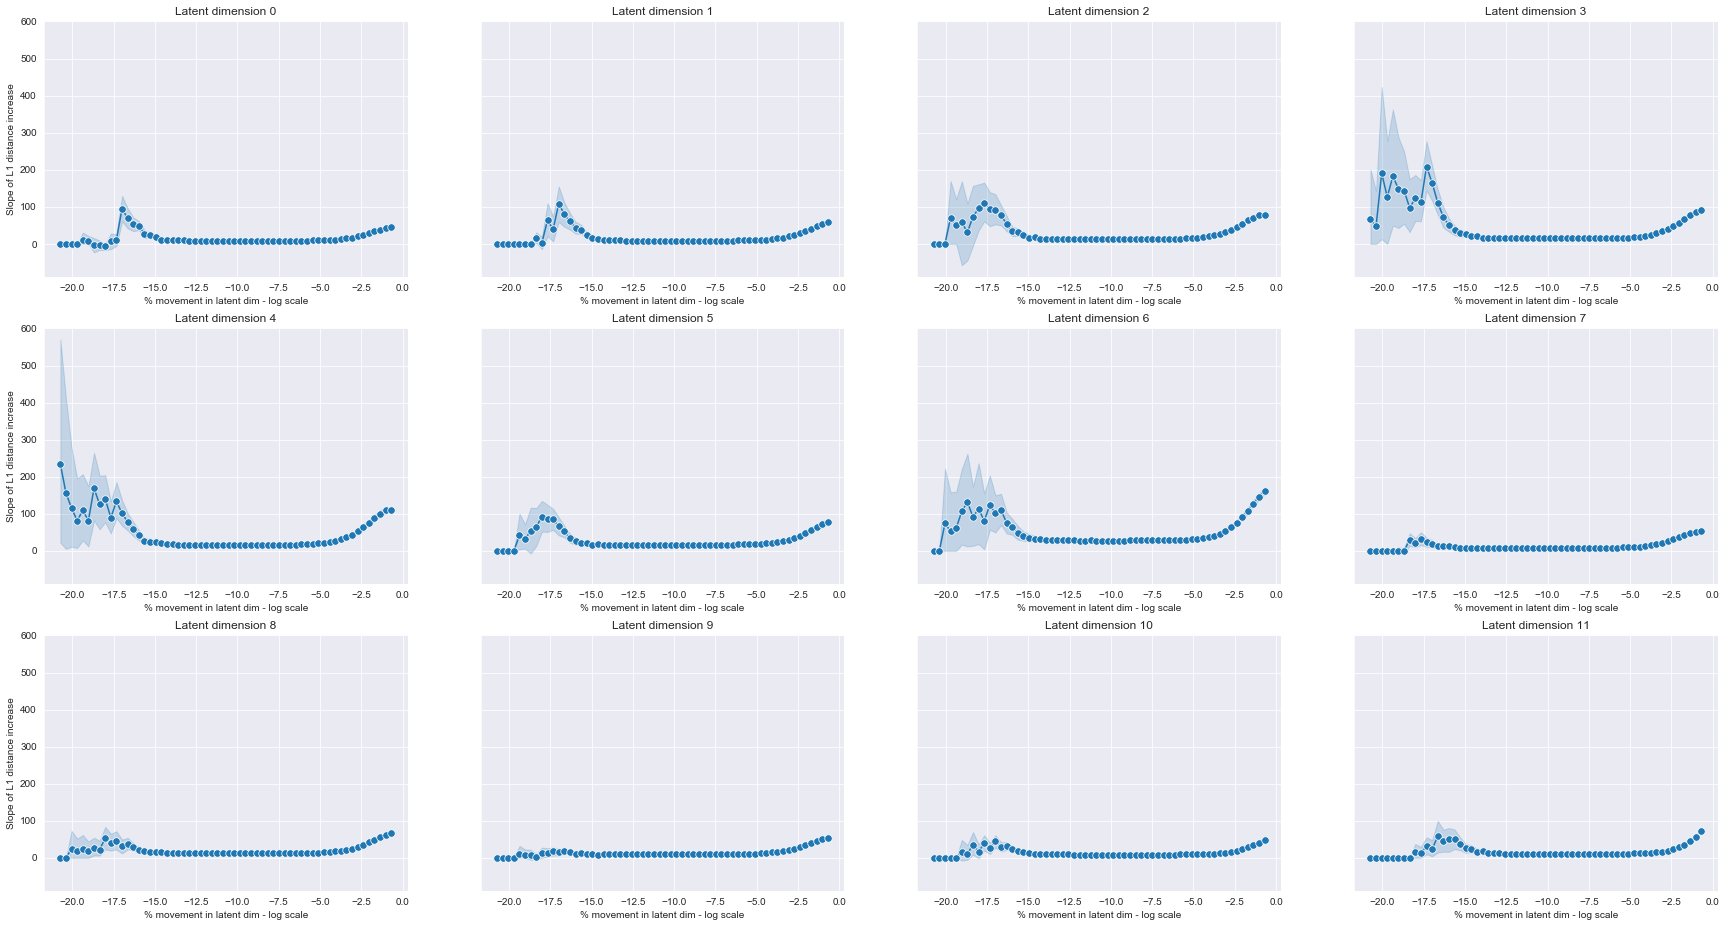

In [321]:
D = codes.shape[1]
nrows = 3; ncols = D//nrows +1 if D%nrows!=0 else D//nrows
sns.set_style('darkgrid')
markersize=15
font_scale=20
ylim=None
xlim=None

fig, ax = plt.subplots(nrows, ncols, sharey=True, figsize=(30,16))
dim=0
for row in range(nrows):
    for col in range(ncols):
        if dim==D: break
        ax[row,col].set_title(f"Latent dimension {dim}")
        x = np.log(np.array([l for l in list(reversed(levels)) for _ in range(N)]))
        ys = latents_effects[dim] 
        hue = [i for _ in range(len(levels)) for i in range(N)] # steps points per each
        axi = sns.lineplot(x, ys.reshape(-1,),
                           ax=ax[row,col], marker=".", markersize=markersize, palette="Greens")
        axi.set(ylabel=f'Slope of L1 distance increase', 
                xlabel='% movement in latent dim - log scale')
        #axi.set_xticklabels([f'{i:.2f}' for i in (levels)])
        #axi.tick_params(axis="x", labelsize=font_scale)
        #axi.tick_params(axis="y", labelsize=font_scale)
        if ylim is not None: axi.set(ylim=(0, ylim))
        if xlim is not None: axi.set(xlim=(-xlim, xlim))
        dim+=1

In [342]:
def compute_slopes(model, codes, originals, distortion_levels, device):
    slopes = []
    D = codes.shape[1]
    num_steps = distortion_levels.shape[1]
    prev_dist = None; prev_loss = None
    for d in range(D):
        d_slopes = []
        for s in range(num_steps):
            _vectors = codes.clone() # N x D
            # Intervenes in the latent space.
            dist = distortion_levels[d,s]
            _vectors[:, d] = dist + _vectors[:,d]
            # Generate the batch of images and computes the loss as MSE distance
            loss = compute_output_distortion(model, _vectors, originals, device)
            if prev_dist is None: slope = torch.zeros(N).to(device)
            else: slope = (loss - prev_loss)/(dist-prev_dist)
            prev_dist = dist; prev_loss = loss
            d_slopes.append(slope)
        slopes.append(torch.stack(d_slopes)) # n_steps x N 
    return torch.stack(slopes) # D x n_steps x N

In [349]:
#derivative plot
device = handler.device
steps = 51
N = 100

idx = torch.randperm(visualiser.test_input.shape[0])[:N]
base_vecs = visualiser.test_input[idx[:N]]
# encode - apply distortion - decode
with torch.no_grad():
    codes = visualiser.model.encode_mu(base_vecs.to(device), update_prior=True)
    ranges = visualiser.model.get_prior_range() # (min, max) for each dimension
    
widths = [(M-m) for (m,M) in ranges]
distortion_levels = np.stack([np.linspace(-w,+w,steps) for w in widths])
ys = compute_slopes(visualiser.model, codes, base_vecs, distortion_levels, device).cpu().numpy() # N x D x steps

In [344]:
ys.shape

(12, 51, 100)

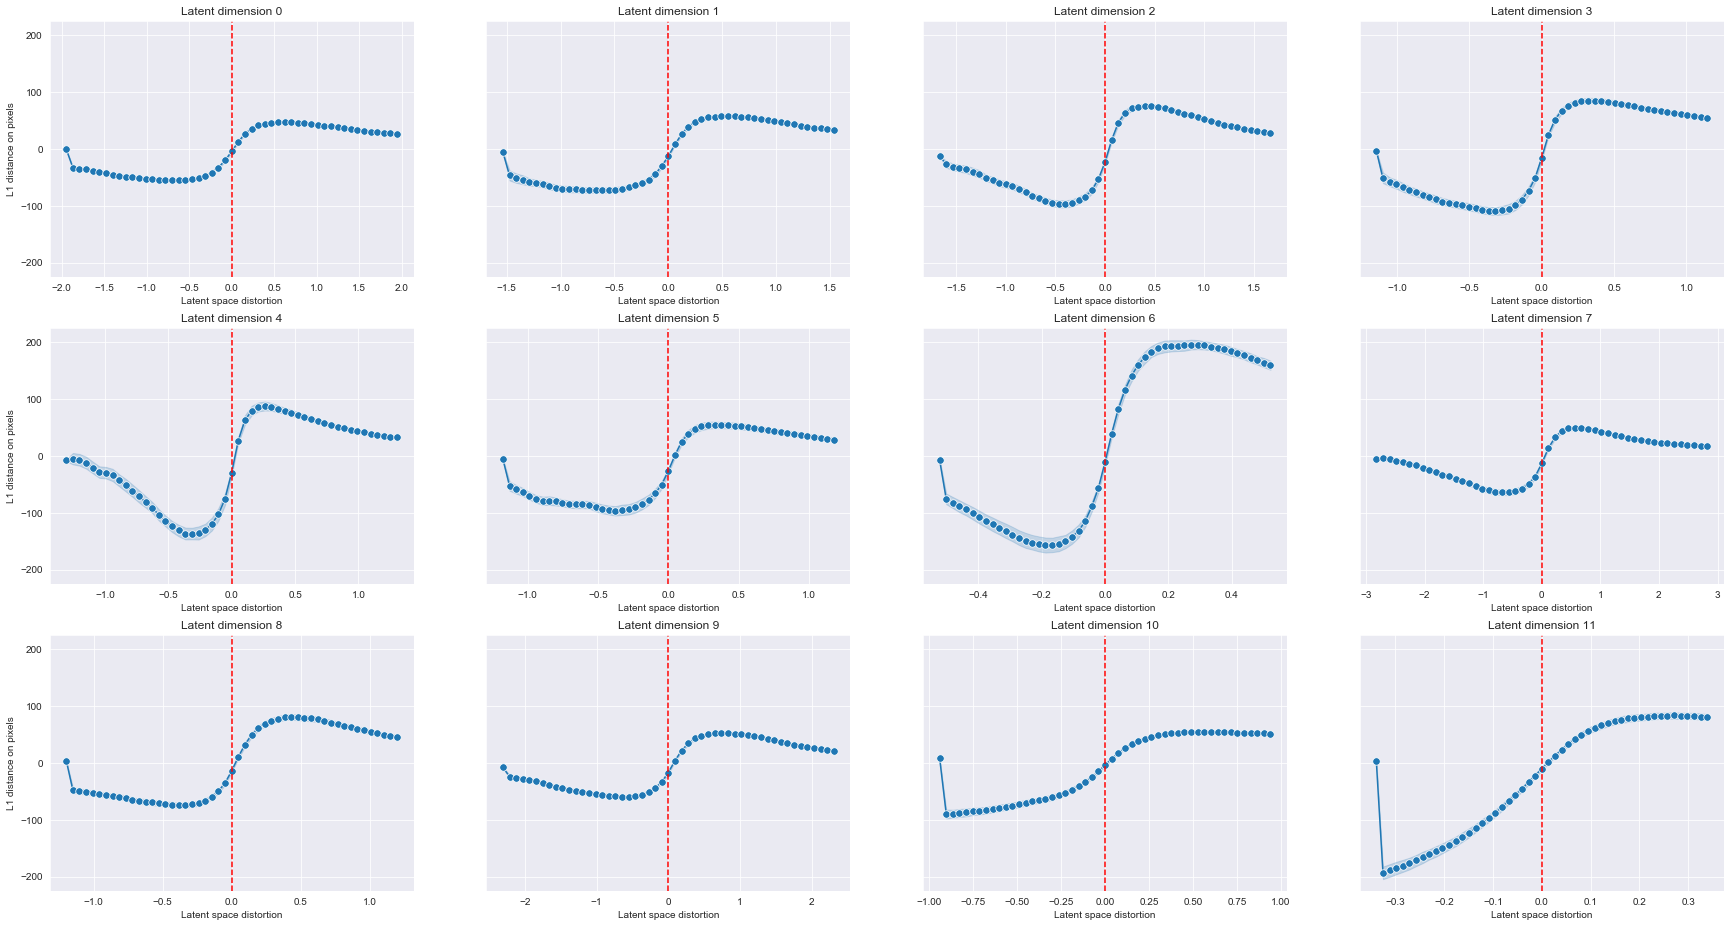

In [350]:
D = codes.shape[1]
nrows = 3; ncols = D//nrows +1 if D%nrows!=0 else D//nrows
sns.set_style('darkgrid')
markersize=15
font_scale=20
ylim=None
xlim=None

fig, ax = plt.subplots(nrows, ncols, sharey=True, figsize=(30,16))
dim=0
for row in range(nrows):
    for col in range(ncols):
        if dim==D: break
        Nlosses = ys[dim,:,:] # steps x N
        ax[row,col].set_title(f"Latent dimension {dim}")
        # x = distortion level ; y = loss x step
        axi = sns.lineplot(np.tile(distortion_levels[dim], N), Nlosses.T.reshape(-1,),
                           ax=ax[row,col], marker=".", markersize=markersize, palette="Greens")
        ax[row,col].axvline(0, color='r', linestyle="--")
        axi.set(ylabel='L1 distance on pixels', xlabel='Latent space distortion')
        #axi.set_xticklabels([f'{i:.2f}' for i in (levels)])
        #axi.tick_params(axis="x", labelsize=font_scale)
        #axi.tick_params(axis="y", labelsize=font_scale)
        if ylim is not None: axi.set(ylim=(0, ylim))
        if xlim is not None: axi.set(xlim=(-xlim, xlim))
        dim+=1